In [43]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import math

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
#from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder

In [44]:
pd.set_option('display.max_columns', None)

# Импорт данных

In [45]:
df_domclick = pd.read_csv("domclick/Санкт-Петербург_domclick_dataset.csv", sep = ";")
df_domclick.info()
df_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             3136 non-null   int64  
 1   region                         3136 non-null   object 
 2   address                        3136 non-null   object 
 3   latitude                       3136 non-null   float64
 4   longitude                      3136 non-null   float64
 5   price                          3136 non-null   int64  
 6   house_floors                   3136 non-null   int64  
 7   house_buildYear                3136 non-null   object 
 8   house_ceilingHeight            3136 non-null   object 
 9   house_hasGarbageDisposer       1576 non-null   object 
 10  house_liftsFreight             1179 non-null   float64
 11  house_liftsPassenger           2095 non-null   float64
 12  house_wallType                 2972 non-null   o

,id,region,address,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaCommonPropery,house_areaNonResidential,house_areaResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,saleType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation,objectInfo_loggias
0,1876832526,Санкт-Петербург,"Пулковское шоссе, 26к7",59.826954,30.329109,7900000,17,2008,undefined,True,1.0,1.0,Панельный,376.3,0,16529.9,993.7,5,Центральное,4,Центральное,10,B,5,Автоматическая,Железобетонный,Иной,Центральное,0,0,Центральное,Приточно-вытяжная,Свободная продажа,1,35.1,8.4,18.4,7,undefined,1,0,NaN,undefined,1.0
1,1834880894,Санкт-Петербург,"Московский проспект, 183-185Б",59.856835,30.316317,13400000,17,2014,undefined,NaN,NaN,1.0,Монолитно-кирпичный,70.7,NaN,36.8,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,1,43.6,15.0,21.2,8,1,undefined,0,NaN,undefined,NaN
2,1823412427,Санкт-Петербург,"Заводская улица, 17",59.831761,30.546789,5100000,33,2019,undefined,NaN,NaN,NaN,Монолитный,62.2,NaN,17298.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,0,26.0,0.0,16.0,9,1,undefined,0,NaN,undefined,1.0
3,1819119667,Санкт-Петербург,"Варшавская улица, 63к1",59.849153,30.314116,24000000,7,1991,undefined,True,NaN,1.0,Кирпичный,41012,14164,28640,6721,4,Центральное,2,Центральное,13,Не присвоен,4,NaN,Железобетонный,Сборный,Центральное,0,0,Центральное,Вытяжная,Альтернатива,5,136.1,18.7,78.3,5,undefined,1,3,True,undefined,NaN
4,1842884704,Санкт-Петербург,"проспект Энтузиастов, 54к2",59.953115,30.491902,8200000,12,1982,undefined,True,NaN,1.0,Панельный,1855,76,9964.8,1327,3,Центральное,2,Центральное,6,NaN,3,Пожарные гидранты,Железобетонный,Ленточный,Центральное,0,0,Центральное,Вытяжная,Свободная продажа,2,52.7,10.2,28.7,12,undefined,1,0,NaN,undefined,1.0


In [46]:
df_cian = pd.read_csv("cian/data_home_SPB.csv")
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68362 entries, 0 to 68361
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 68362 non-null  object 
 1   price                68362 non-null  int64  
 2   price_for_metr       68362 non-null  int64  
 3   floor_object         68362 non-null  int64  
 4   total_floors         68362 non-null  int64  
 5   type_of_home         68362 non-null  object 
 6   square_home          68362 non-null  float64
 7   live_square          68362 non-null  object 
 8   kitchen_square       68362 non-null  object 
 9   height_ceiling       68362 non-null  object 
 10  bathroom             68362 non-null  object 
 11  balcony              68362 non-null  object 
 12  repair               68362 non-null  object 
 13  yer_home             68362 non-null  object 
 14  garbage_chute        68362 non-null  object 
 15  type_home            68362 non-null 

In [47]:
df_cian.head()

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link
0,1/2 квартиры,1200000,36923,8,9,Вторичка,32.5,16.0,10.0,Null,1,Null,Евроремонт,1968,Null,Кирпичный,Железобетонные,4,Центральное,Нет,Центральное,Null,1,"Санкт-Петербург, р-н Красносельский, мкр. Крас...",https://spb.cian.ru/sale/flat/286841710/
1,1/9 квартиры,1100000,17107,8,16,Вторичка,64.3,Null,Null,Null,Null,Null,Косметический,1985,Да,Панельный,Железобетонные,1,Центральное,Нет,Null,Null,2,"Санкт-Петербург, р-н Красносельский, Южно-Прим...",https://spb.cian.ru/sale/flat/281586055/
2,3-комн. квартира,1175950,15312,9,12,Вторичка,76.8,Null,13.2,Null,1,1,Без ремонта,2022,Null,Null,Нет информации,10,Нет информации,Нет,Null,Null,1,"Санкт-Петербург, р-н Пушкинский, мкр. Шушары, ...",https://spb.cian.ru/sale/flat/285509928/
3,1/3 квартиры,1499000,51690,3,5,Вторичка,44.8,29.0,6.0,Null,1,1,Косметический,1963,Null,Кирпичный,Железобетонные,6,Центральное,Нет,Центральное,Null,Null,"Санкт-Петербург, р-н Московский, Гагаринское, ...",https://spb.cian.ru/sale/flat/290024904/
4,Доля,1600000,7583,14,15,Вторичка,211.0,12.0,7.0,Null,1,1,Без ремонта,1978,Null,Кирпичный,Железобетонные,3,Центральное,Нет,Null,Null,Null,"Санкт-Петербург, р-н Кировский, Красненькая ре...",https://spb.cian.ru/sale/flat/281728969/


# Подготовка данных

In [48]:
df_domclick = df_domclick.replace('undefined', np.nan)
df_domclick['objectInfo_kitchenArea'] = df_domclick['objectInfo_kitchenArea'].replace(0, np.nan)
df_domclick['objectInfo_livingArea'] = df_domclick['objectInfo_livingArea'].replace(0, np.nan)

In [49]:
df_domclick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             3136 non-null   int64  
 1   region                         3136 non-null   object 
 2   address                        3136 non-null   object 
 3   latitude                       3136 non-null   float64
 4   longitude                      3136 non-null   float64
 5   price                          3136 non-null   int64  
 6   house_floors                   3136 non-null   int64  
 7   house_buildYear                3114 non-null   object 
 8   house_ceilingHeight            1575 non-null   object 
 9   house_hasGarbageDisposer       1576 non-null   object 
 10  house_liftsFreight             1179 non-null   float64
 11  house_liftsPassenger           2095 non-null   float64
 12  house_wallType                 2850 non-null   o

In [50]:
df_cian = df_cian.drop_duplicates(keep = 'last')
df_cian = df_cian.replace('Null', np.nan)
df_cian = df_cian.replace('Нет информации', np.nan)
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43046 entries, 0 to 68361
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 43046 non-null  object 
 1   price                43046 non-null  int64  
 2   price_for_metr       43046 non-null  int64  
 3   floor_object         43046 non-null  int64  
 4   total_floors         43046 non-null  int64  
 5   type_of_home         43046 non-null  object 
 6   square_home          43046 non-null  float64
 7   live_square          38095 non-null  object 
 8   kitchen_square       35548 non-null  object 
 9   height_ceiling       33402 non-null  object 
 10  bathroom             33368 non-null  object 
 11  balcony              23424 non-null  object 
 12  repair               26285 non-null  object 
 13  yer_home             25067 non-null  object 
 14  garbage_chute        7654 non-null   object 
 15  type_home            34906 non-null  obje

In [51]:
df_cian['name'].unique()

array(['1/2 квартиры', '1/9 квартиры', '3-комн. квартира', '1/3 квартиры',
       'Доля', '12/252 квартиры', '13/133 квартиры', '20',
       '5/12 квартиры', '12/43 квартиры', '16/116 квартиры', 'Студия',
       '9% квартиры', '17/45 квартиры', '12/140 квартиры', '1/5 квартиры',
       '1/4 квартиры', '13/49 квартиры', '13/95 квартиры',
       '17/145 квартиры', 'Апартаменты-студия', '4% квартиры',
       '12/51 квартиры', '12/77 квартиры', '16/133 квартиры',
       '3/5 квартиры', '1/14 квартиры', '12/54 квартиры',
       '66/330 квартиры', '1/8 квартиры', '2/5 квартиры',
       '15/115 квартиры', '11/41 квартиры', '19/100 квартиры',
       '2-комн. квартира', '18/25 квартиры', '1/10 квартиры',
       '10/53 квартиры', '1-комн. апартаменты', '24/144 квартиры',
       '15/199 квартиры', '4/9 квартиры', '17/33 квартиры',
       '15% квартиры', '17/199 квартиры', '17% квартиры',
       '13/262 квартиры', '123/933 квартиры', '20/607 квартиры',
       '1-комн. квартира', '25/100 квартиры',

In [52]:
df_cian = df_cian.drop(df_cian[df_cian.name.str.contains('%') | df_cian.name.str.contains('/') | df_cian.name.str.contains('Много') 
                       | df_cian.name.str.contains('Доля') | df_cian.name.str.contains('0') | df_cian.name.str.contains('свободной')].index)

In [53]:
df_cian['name'].unique()

array(['3-комн. квартира', 'Студия', 'Апартаменты-студия',
       '2-комн. квартира', '1-комн. апартаменты', '1-комн. квартира',
       '4-комн. квартира', '5-комн. квартира', '2-комн. апартаменты',
       '3-комн. апартаменты', '4-комн. апартаменты',
       '5-комн. апартаменты'], dtype=object)

In [54]:
df_cian['room_count'] = df_cian.name.str[:1]
df_cian['room_count'] = df_cian['room_count'].str.replace('А','0')
df_cian['room_count'] = df_cian['room_count'].str.replace('С','0')
df_cian['room_count'].unique()

array(['3', '0', '2', '1', '4', '5'], dtype=object)

In [55]:
df_domclick['objectInfo_renovation'].unique()

array([nan, 'Евро', 'Требует ремонта', 'Дизайнерский', 'Косметический',
       'Без ремонта', 'чистовая', 'евроремонт', 'Под чистовой ремонт',
       'косметический', 'Отсутствует', 'С отделкой', 'черновая',
       'чистовая отделка', 'Хороший', 'Частичный ремонт',
       'Требуется ремонт'], dtype=object)

In [56]:
df_cian['repair'].unique()

array(['Без ремонта', 'Евроремонт', 'Дизайнерский', 'Косметический', nan],
      dtype=object)

In [57]:
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('косметический', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('косметический ремонт', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Косметический ремонт', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('После косметического ремонта', 'Косметический')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Дизайнерский ремонт', 'Дизайнерский')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евростандарт', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евро', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('евроремонт', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('euro', 'Евроремонт')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Отсутствует', 'Без ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('no', 'Без ремонта')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Предчистовая', 'Предчистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('предчистовая', 'Предчистовая отделка')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется косметический ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется капитальный ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('устаревший ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется легкий ремонт', 'Требует ремонта')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется внутренняя отделка', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под чистовой ремонт', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('С отделкой', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('черновая', 'Под чистовую отделку')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('высококачественная отделка', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('чистовая отделка', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('чистовая', 'Чистовая отделка')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('После ремонта', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Ремонт', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('стандартный ремонт', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Ремонт от застройщика', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Хороший', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('полная', 'Стандартный ремонт')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('под отделку', 'Под ключ')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('под ключ', 'Под ключ')

In [58]:
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Косметический', '1')
df_cian['repair'] = df_cian['repair'].replace('Косметический', '1')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Без ремонта', '0')
df_cian['repair'] = df_cian['repair'].replace('Без ремонта', '0')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евроремонт', '2')
df_cian['repair'] = df_cian['repair'].replace('Евроремонт', '2')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Дизайнерский', '3')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Авторский проект', '3')
df_cian['repair'] = df_cian['repair'].replace('Дизайнерский', '3')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под чистовую отделку', '4')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требует ремонта', '5')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Чистовая отделка', '6')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под ключ', '7')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Предчистовая отделка', '8')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Стандартный ремонт', '9')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Частичный ремонт', '10')

In [59]:
df_cian['repair'].unique()

array(['0', '2', '3', '1', nan], dtype=object)

In [60]:
df_domclick['objectInfo_renovation'].unique()

array([nan, '2', '5', '3', '1', '0', '6', '4', '9', '10'], dtype=object)

In [61]:
df_domclick['house_wallType'].unique()

array(['Панельный', 'Монолитно-кирпичный', 'Монолитный', 'Кирпичный',
       'Смешанные', 'Железобетон', nan, 'Иные', 'Железобетонная панель',
       'Блочный', 'Кирпично-монолитный', 'Деревянный',
       'Монолитно-каркасный'], dtype=object)

In [62]:
df_cian['type_home'].unique()

array([nan, 'Кирпичный', 'Блочный', 'Монолитный', 'Панельный',
       'Монолитно-кирпичный', 'Деревянный', 'Каркасный',
       'Газосиликатный блок', 'Сталинский', 'Старый фонд'], dtype=object)

In [63]:
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Кирпично-монолитный', 'Монолитно-кирпичный')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетонная 1-слойная панель', 'Керамзитобетон')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Иные', np.nan)

In [64]:
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Панельный', '0')
df_cian['type_home'] = df_cian['type_home'].replace('Панельный', '0')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Кирпичный', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Кирпичный', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Сталинский', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Старый фонд', '1')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Блочный', '2')
df_cian['type_home'] = df_cian['type_home'].replace('Блочный', '2')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитный', '3')
df_cian['type_home'] = df_cian['type_home'].replace('Монолитный', '3')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитно-кирпичный', '4')
df_cian['type_home'] = df_cian['type_home'].replace('Монолитно-кирпичный', '4')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Деревянный', '5')
df_cian['type_home'] = df_cian['type_home'].replace('Деревянный', '5')

df_cian['type_home'] = df_cian['type_home'].replace('Каркасный', '6')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Железобетонная панель', '7')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Железобетон', '7')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетон', '8')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетон', '8')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Смешанные', '9')

df_cian['type_home'] = df_cian['type_home'].replace('Газобетонный блок', '10')

df_cian['type_home'] = df_cian['type_home'].replace('Газосиликатный блок', '11')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитно-каркасный', '12')

In [65]:
df_domclick['house_wallType'].unique()

array(['0', '4', '3', '1', '9', '7', nan, '2', '5', '12'], dtype=object)

In [66]:
df_cian['type_home'].unique()

array([nan, '1', '2', '3', '0', '4', '5', '6', '11'], dtype=object)

In [67]:
df_cian['type_of_overlap'].unique()

array([nan, 'Железобетонные', 'Деревянные', 'Смешанные'], dtype=object)

In [68]:
df_domclick['house_floorType'].unique()

array(['Железобетонный', 'Смешанный', 'Деревянный', 'Монолитный', nan,
       'Иное', 'Бетонный'], dtype=object)

In [69]:
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Железобетонные', 'Железобетонный')
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Смешанные', 'Смешанный')
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Деревянные', 'Деревянный')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Иное', np.nan)

In [70]:
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Железобетонный', '0')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Железобетонный', '0')

df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Смешанный', '1')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Смешанный', '1')

df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Деревянный', '2')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Деревянный', '2')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Монолитный', '3')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Бетонный', '4')

In [71]:
df_cian['type_of_overlap'].unique()

array([nan, '0', '2', '1'], dtype=object)

In [72]:
df_domclick['house_floorType'].unique()

array(['0', '1', '2', '3', nan, '4'], dtype=object)

In [73]:
df_cian['heating'].unique()

array([nan, 'Центральное', 'Индивидуальный тепловой пункт',
       'Автономная котельная', 'Печь', 'Котел/Квартирное отопление',
       'Нет'], dtype=object)

In [74]:
df_domclick['house_heatingType'].unique()

array(['Центральное', nan,
       'Автономная котельная (крышная встроенно-пристроенная)',
       'Индивидуальный тепловой пункт (ИТП)',
       'Квартирное отопление (квартирный котел)', 'Печное'], dtype=object)

In [75]:
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Квартирное отопление (квартирный котел)', 'Котел/Квартирное отопление')
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Автономная котельная (крышная встроенно-пристроенная)', 'Автономная котельная')


In [76]:
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Центральное', '0')
df_cian['heating'] = df_cian['heating'].replace('Центральное', '0')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Котел/Квартирное отопление', '1')
df_cian['heating'] = df_cian['heating'].replace('Котел/Квартирное отопление', '1')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Автономная котельная', '2')
df_cian['heating'] = df_cian['heating'].replace('Автономная котельная', '2')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Индивидуальный тепловой пункт (ИТП)', '3')
df_cian['heating'] = df_cian['heating'].replace('Индивидуальный тепловой пункт', '3')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Печное', '4')
df_cian['heating'] = df_cian['heating'].replace('Печь', '4')

df_cian['heating'] = df_cian['heating'].replace('Электрическое', '5')

df_cian = df_cian[df_cian.heating != 'Нет']

In [77]:
df_domclick['house_heatingType'].unique()

array(['0', nan, '2', '3', '1', '4'], dtype=object)

In [78]:
df_cian['heating'].unique()

array([nan, '0', '3', '2', '4', '1'], dtype=object)

In [79]:
df_domclick['objectInfo_hasGas'] = df_domclick['objectInfo_hasGas'].replace('True', True)
df_domclick['objectInfo_hasGas'] = df_domclick['objectInfo_hasGas'].replace('False', True)

In [80]:
df_domclick['objectInfo_hasGas'].unique()

array([nan, True, False], dtype=object)

In [81]:
df_cian['gas_supply'] = df_cian['gas_supply'].replace('Центральное', True)
df_cian['gas_supply'] = df_cian['gas_supply'].replace('Автономное', True)
df_cian['gas_supply'] = df_cian['gas_supply'].replace(np.nan, False)

In [82]:
df_cian['gas_supply'].unique()

array([False,  True])

<Axes: xlabel='accident_rate', ylabel='count'>

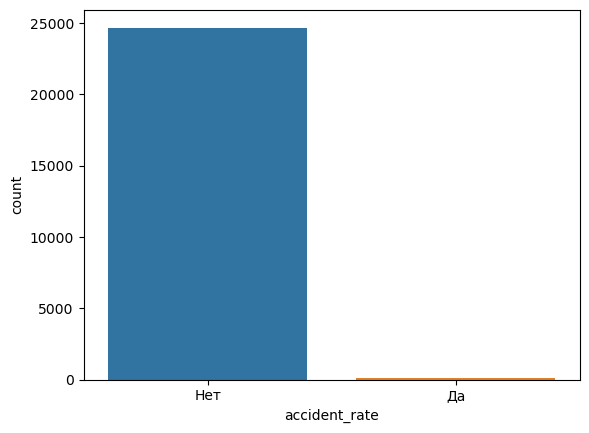

In [83]:
sns.countplot(data=df_cian, x='accident_rate')

<Axes: xlabel='finishing', ylabel='count'>

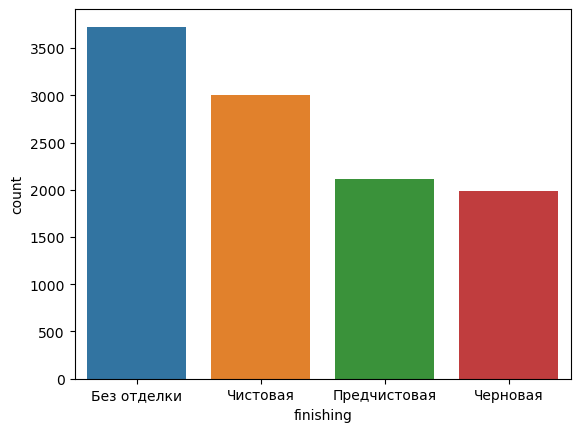

In [84]:
sns.countplot(data=df_cian, x='finishing', order = df_cian['finishing'].value_counts().index[:4])

# Анализ признаков

<Axes: xlabel='price', ylabel='Count'>

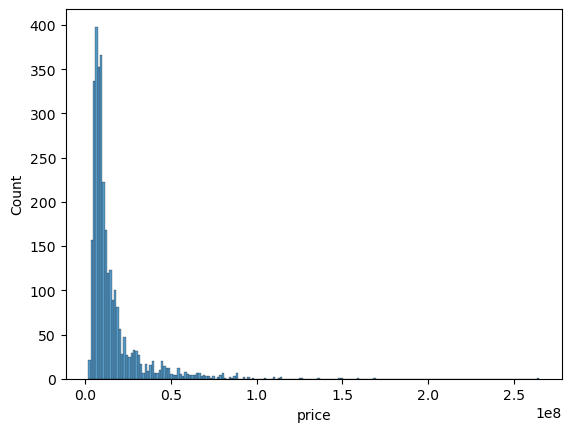

In [85]:
sns.histplot(data = df_domclick, x = 'price')

In [86]:
#df_domclick.query('price > 100000000')

<Axes: xlabel='price', ylabel='Count'>

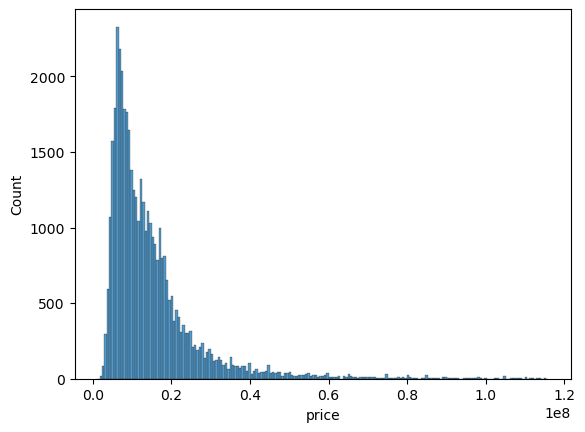

In [87]:
sns.histplot(data = df_cian, x = 'price')

<Axes: xlabel='house_floors', ylabel='Count'>

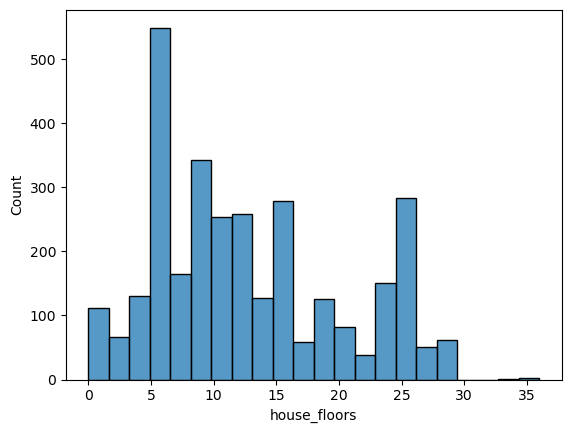

In [88]:
sns.histplot(data = df_domclick, x = 'house_floors')

<Axes: xlabel='total_floors', ylabel='Count'>

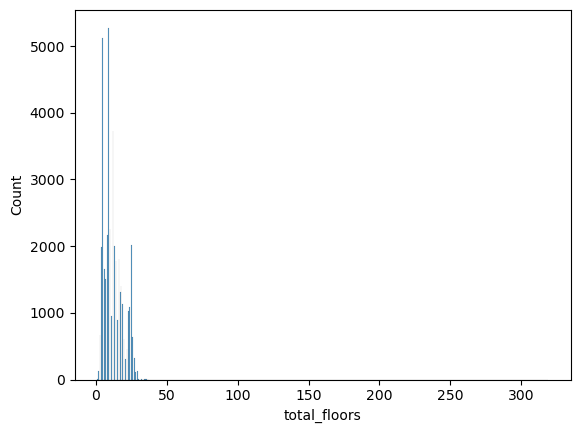

In [89]:
sns.histplot(data = df_cian, x = 'total_floors')

In [90]:
df_cian.query('total_floors > 150')

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link,room_count
2875,2-комн. квартира,4400000,100000,1,319,Вторичка,44.0,30.0,6.0,2.6,1,NaN,3,NaN,NaN,1,NaN,NaN,NaN,NaN,False,NaN,NaN,"Санкт-Петербург, р-н Красносельский, мкр. Крас...",https://spb.cian.ru/sale/flat/290836562/,2


<Axes: xlabel='objectInfo_floor', ylabel='Count'>

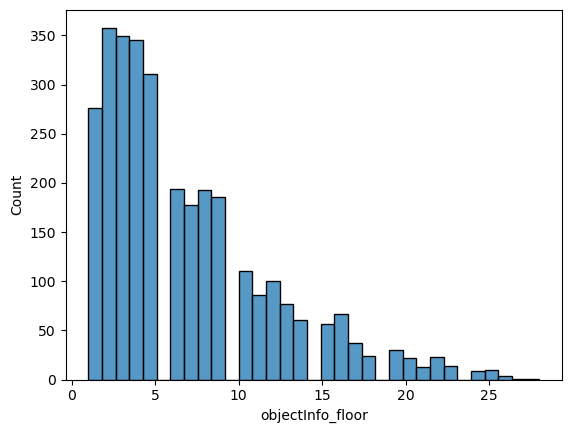

In [91]:
sns.histplot(data = df_domclick, x = 'objectInfo_floor')

<Axes: xlabel='floor_object', ylabel='Count'>

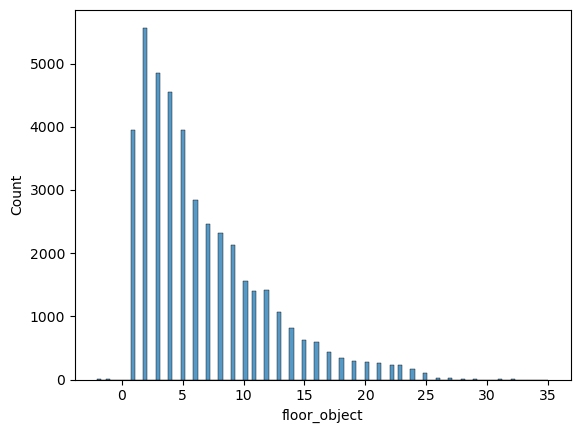

In [92]:
sns.histplot(data = df_cian, x = 'floor_object')

In [93]:
df_cian.query('floor_object < 0')

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link,room_count
24,Апартаменты-студия,2138000,281316,-1,6,Вторичка Апартаменты,7.60,NaN,1.5,NaN,NaN,NaN,2,1904,NaN,1,0,4,0,Нет,True,NaN,NaN,"Санкт-Петербург, р-н Адмиралтейский, Екатеринг...",https://spb.cian.ru/sale/flat/293385496/,0
91,Апартаменты-студия,2300000,280488,-1,3,Вторичка Апартаменты,8.20,1.7,1.5,NaN,NaN,NaN,2,1862,NaN,1,0,1,0,Нет,True,NaN,NaN,"Санкт-Петербург, р-н Центральный, Лиговка-Ямск...",https://spb.cian.ru/sale/flat/293385492/,0
104,Апартаменты-студия,2403000,44500,-1,3,Вторичка Апартаменты,54.00,34.6,NaN,2.3,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,False,NaN,NaN,"Санкт-Петербург, р-н Петродворцовый, мкр. Ломо...",https://spb.cian.ru/sale/flat/286320854/,0
187,Апартаменты-студия,2800000,250000,-1,6,Вторичка Апартаменты,11.20,4.2,2.0,2.6,1,NaN,2,1904,NaN,1,0,4,0,Нет,True,NaN,NaN,"Санкт-Петербург, р-н Адмиралтейский, Екатеринг...",https://spb.cian.ru/sale/flat/293295480/,0
189,Апартаменты-студия,2650000,205426,-1,3,Вторичка Апартаменты,12.90,3.9,4.0,NaN,1,NaN,3,1904,NaN,1,0,2,0,Нет,True,NaN,NaN,"Санкт-Петербург, р-н Кировский, Нарвский, прос...",https://spb.cian.ru/sale/flat/293134954/,0
212,Студия,2914500,300464,-1,4,Вторичка,9.70,2.2,2.5,NaN,NaN,NaN,2,1878,NaN,1,0,3,0,Нет,True,NaN,NaN,"Санкт-Петербург, р-н Центральный, Смольнинское...",https://spb.cian.ru/sale/flat/293385497/,0
216,Апартаменты-студия,2990000,180120,-1,3,Вторичка Апартаменты,16.60,9.6,2.0,2.2,1,NaN,2,1891,NaN,1,0,4,0,Нет,True,NaN,NaN,"Санкт-Петербург, р-н Центральный, Смольнинское...",https://spb.cian.ru/sale/flat/291224160/,0
230,Апартаменты-студия,2990000,188050,-1,3,Вторичка Апартаменты,15.90,8.9,2.0,NaN,1,NaN,2,1833,NaN,1,1,4,0,Нет,True,NaN,NaN,"Санкт-Петербург, р-н Адмиралтейский, Коломна, ...",https://spb.cian.ru/sale/flat/293749534/,0
238,Студия,2980000,225758,-1,3,Вторичка,13.20,6.2,2.0,NaN,1,NaN,3,1904,NaN,1,0,2,0,Нет,True,NaN,NaN,"Санкт-Петербург, р-н Кировский, Нарвский, прос...",https://spb.cian.ru/sale/flat/293131837/,0
319,Студия,3400000,179799,-2,2,Вторичка,18.91,11.9,2.0,NaN,1,NaN,3,2005,NaN,NaN,NaN,3,NaN,Нет,False,NaN,NaN,"Санкт-Петербург, р-н Василеостровский, Остров ...",https://spb.cian.ru/sale/flat/287998978/,0


<Axes: xlabel='objectInfo_area', ylabel='Count'>

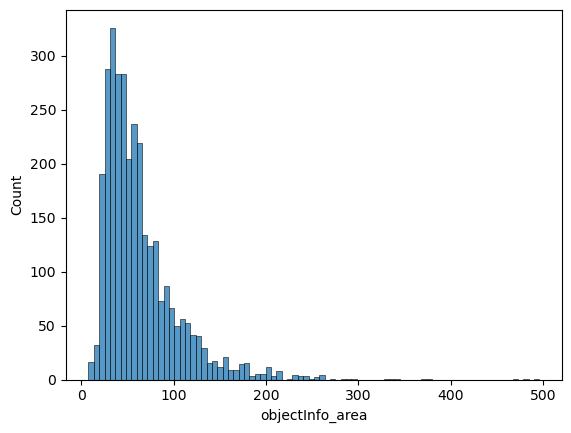

In [94]:
sns.histplot(data = df_domclick, x = 'objectInfo_area')

<Axes: xlabel='square_home', ylabel='Count'>

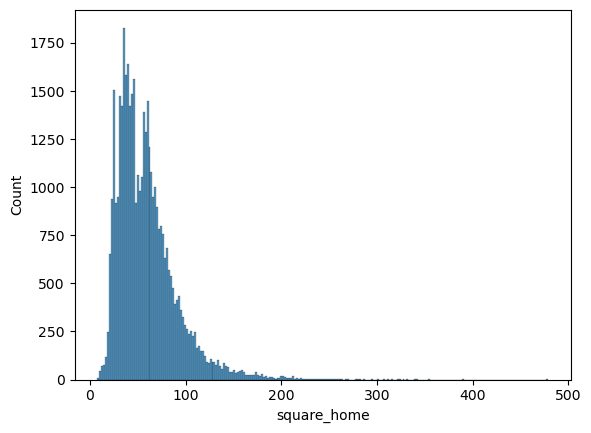

In [95]:
sns.histplot(data = df_cian, x = 'square_home')

<Axes: xlabel='objectInfo_livingArea', ylabel='Count'>

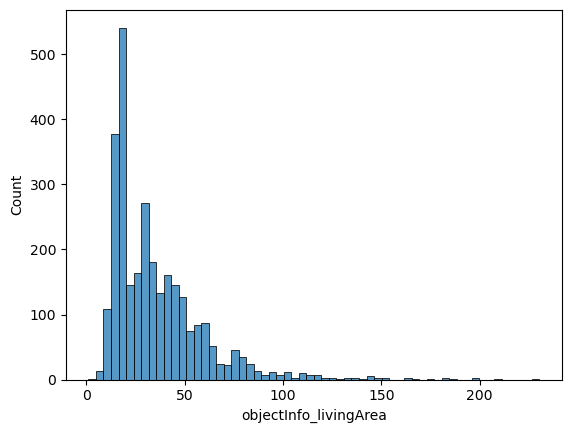

In [96]:
sns.histplot(data = df_domclick, x = 'objectInfo_livingArea')

<Axes: xlabel='live_square', ylabel='Count'>

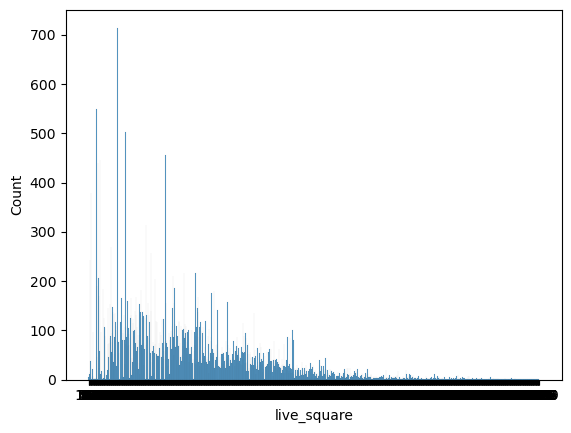

In [97]:
sns.histplot(data = df_cian, x = 'live_square')

<Axes: xlabel='objectInfo_kitchenArea', ylabel='Count'>

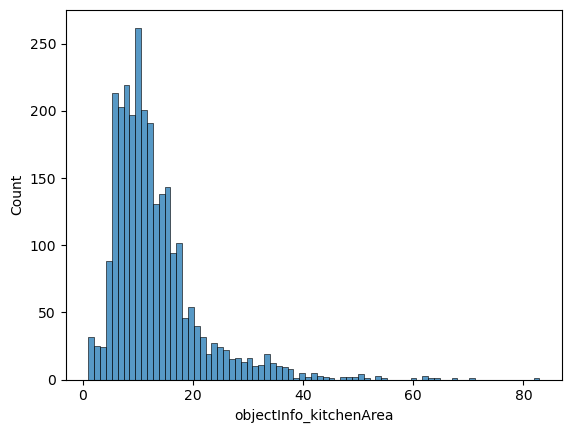

In [98]:
sns.histplot(data = df_domclick, x = 'objectInfo_kitchenArea')

<Axes: xlabel='kitchen_square', ylabel='Count'>

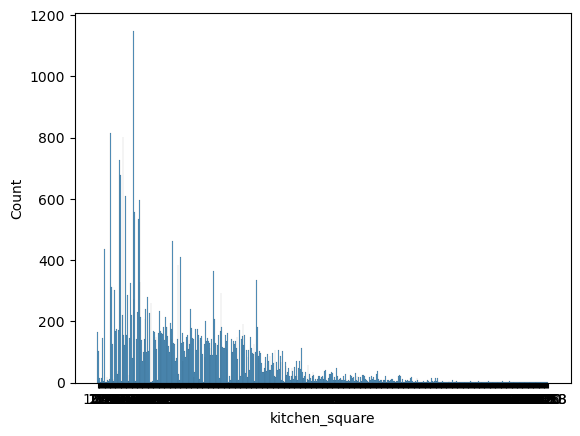

In [99]:
sns.histplot(data = df_cian, x = 'kitchen_square')

<Axes: xlabel='house_ceilingHeight', ylabel='Count'>

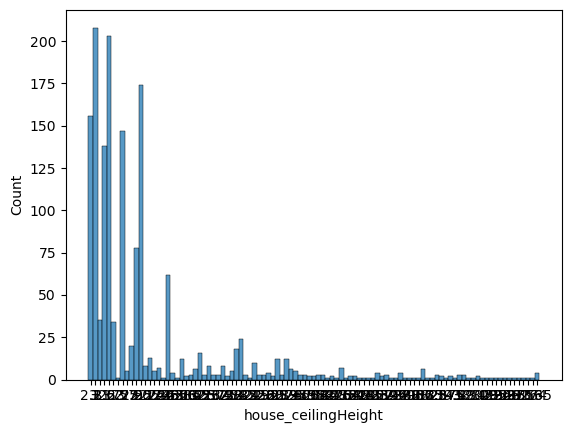

In [100]:
sns.histplot(data = df_domclick, x = 'house_ceilingHeight')

<Axes: xlabel='height_ceiling', ylabel='Count'>

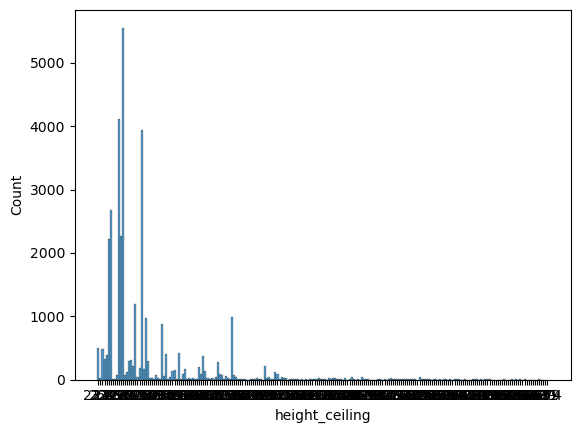

In [101]:
sns.histplot(data = df_cian, x = 'height_ceiling')

<Axes: xlabel='house_buildYear', ylabel='Count'>

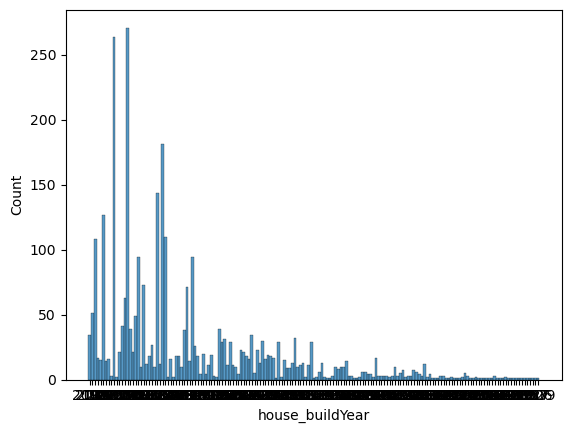

In [102]:
sns.histplot(data = df_domclick, x = 'house_buildYear')

<Axes: xlabel='yer_home', ylabel='Count'>

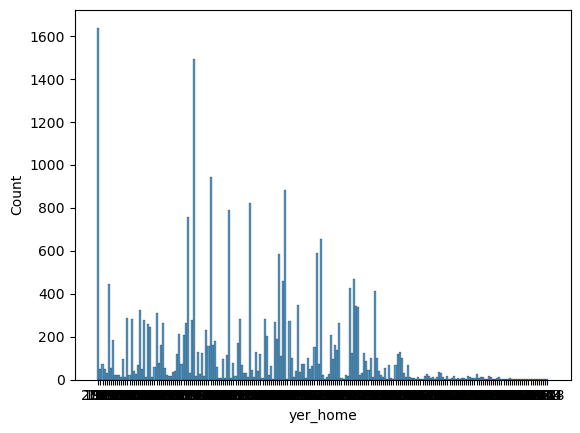

In [103]:
sns.histplot(data = df_cian, x = 'yer_home')

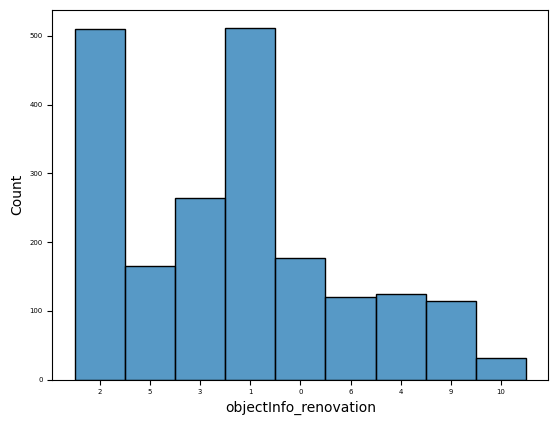

In [104]:
b = sns.histplot(data = df_domclick, x = 'objectInfo_renovation')
b.tick_params(labelsize=5)

In [105]:
df_domclick['objectInfo_renovation'].unique()

array([nan, '2', '5', '3', '1', '0', '6', '4', '9', '10'], dtype=object)

<Axes: xlabel='repair', ylabel='Count'>

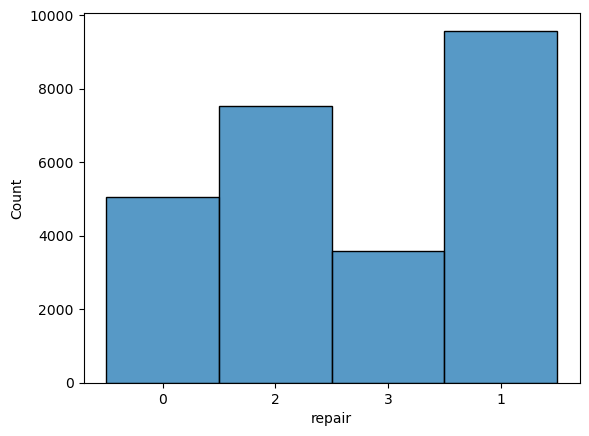

In [106]:
sns.histplot(data = df_cian, x = 'repair')

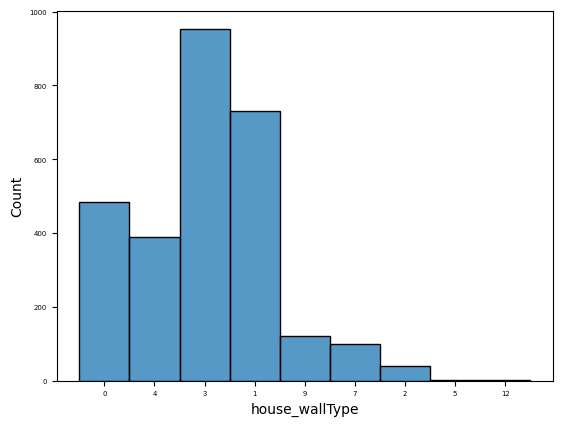

In [107]:
b = sns.histplot(data = df_domclick, x = 'house_wallType')
b.tick_params(labelsize=5)

In [108]:
df_domclick['house_wallType'].unique()

array(['0', '4', '3', '1', '9', '7', nan, '2', '5', '12'], dtype=object)

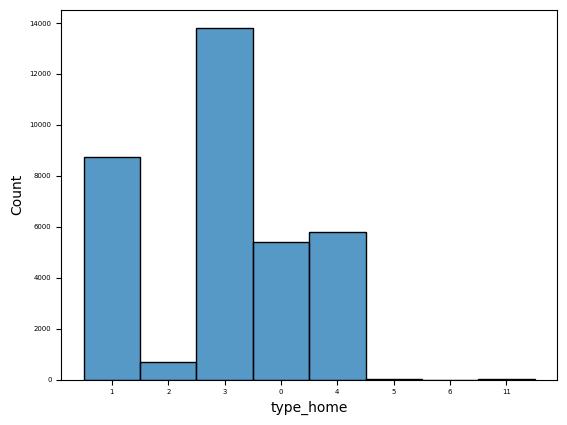

In [109]:
b = sns.histplot(data = df_cian, x = 'type_home')
b.tick_params(labelsize=5)

In [110]:
df_cian['type_home'].unique()

array([nan, '1', '2', '3', '0', '4', '5', '6', '11'], dtype=object)

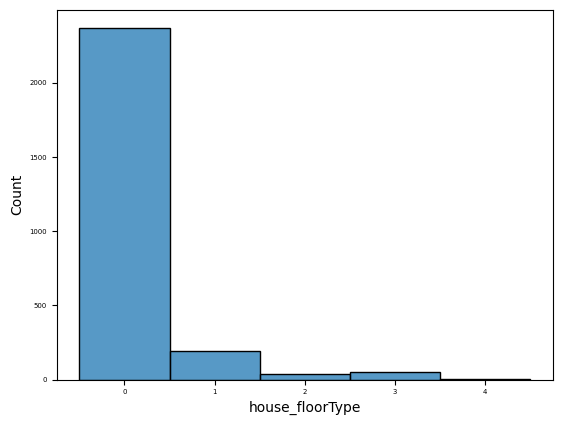

In [111]:
b = sns.histplot(data = df_domclick, x = 'house_floorType')
b.tick_params(labelsize=5)

In [112]:
df_domclick['house_floorType'].unique()

array(['0', '1', '2', '3', nan, '4'], dtype=object)

<Axes: xlabel='type_of_overlap', ylabel='Count'>

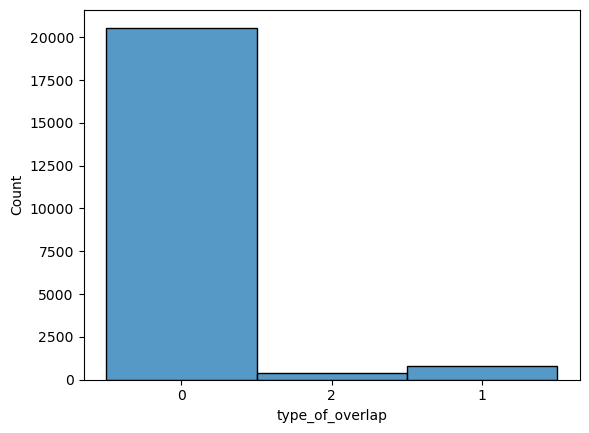

In [113]:
sns.histplot(data = df_cian, x = 'type_of_overlap')

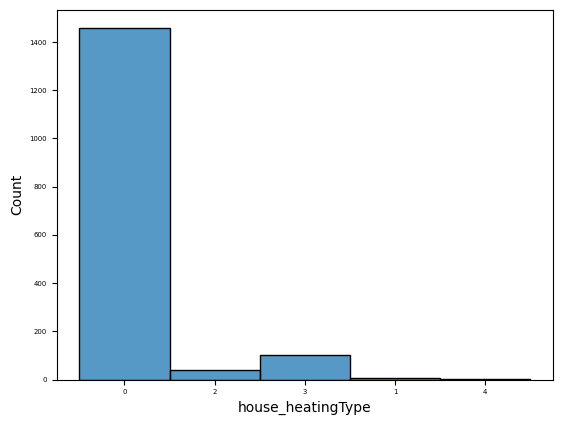

In [114]:
b = sns.histplot(data = df_domclick, x = 'house_heatingType')
b.tick_params(labelsize=5)

In [115]:
df_domclick['house_heatingType'].unique()

array(['0', nan, '2', '3', '1', '4'], dtype=object)

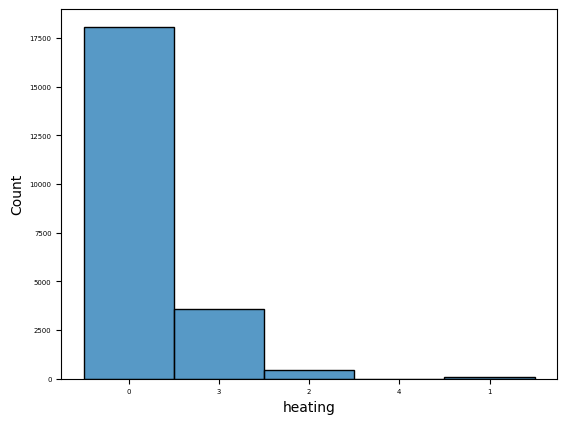

In [116]:
b = sns.histplot(data = df_cian, x = 'heating')
b.tick_params(labelsize=5)

In [117]:
df_cian['heating'].unique()

array([nan, '0', '3', '2', '4', '1'], dtype=object)

<Axes: xlabel='house_entranceCount', ylabel='count'>

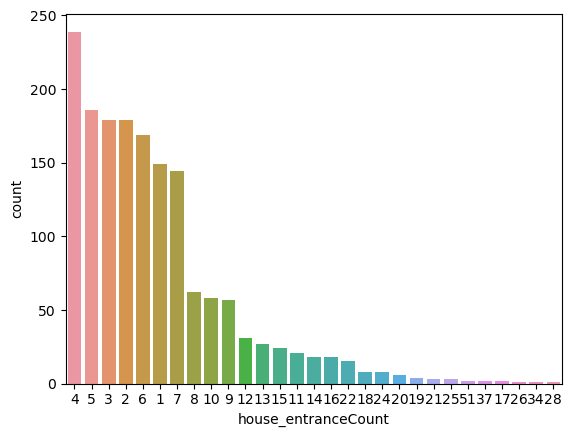

In [118]:
sns.countplot(data = df_domclick, x = 'house_entranceCount', order = df_domclick['house_entranceCount'].value_counts().index)

<Axes: xlabel='entrances', ylabel='count'>

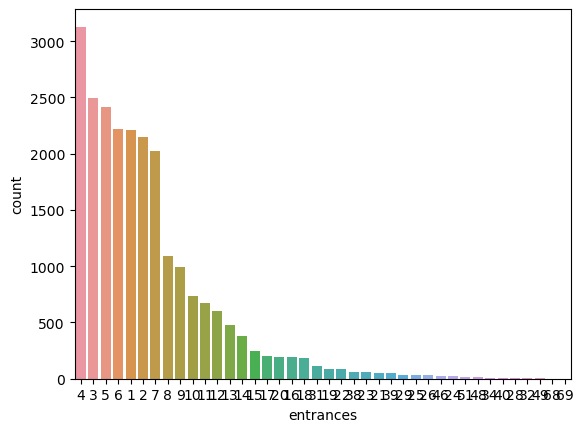

In [119]:
sns.countplot(data = df_cian, x = 'entrances', order = df_cian['entrances'].value_counts().index)

<Axes: xlabel='house_elevatorsCount', ylabel='count'>

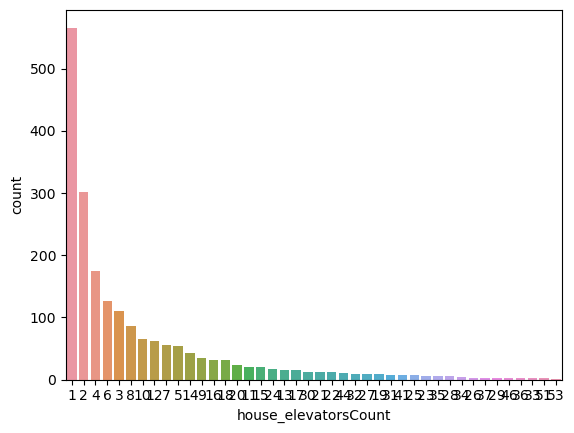

In [120]:
sns.countplot(data = df_domclick, x = 'house_elevatorsCount', order = df_domclick['house_elevatorsCount'].value_counts().index)

<Axes: xlabel='number_of_elevators', ylabel='count'>

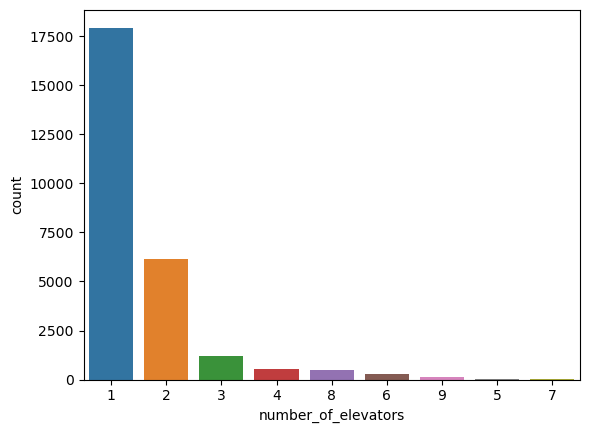

In [121]:
sns.countplot(data = df_cian, x = 'number_of_elevators', order = df_cian['number_of_elevators'].value_counts().index)

# Кодирование данных

In [122]:
df_domclick_prepared = df_domclick.drop(columns = ['id', 'region', 'address', 'house_areaCommonPropery', 'house_areaResidential', 'objectInfo_loggias', 'saleType'])

cat_cols = ['house_hasGarbageDisposer', 'house_coldWaterType', 'house_electricalType', 'house_energyEfficiency',
           'house_fireFightingType', 'house_foundationType', 'house_sewerageType', 'house_ventilationType', 'objectInfo_hasGas']



df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3136 non-null   float64
 1   longitude                      3136 non-null   float64
 2   price                          3136 non-null   int64  
 3   house_floors                   3136 non-null   int64  
 4   house_buildYear                3114 non-null   object 
 5   house_ceilingHeight            1575 non-null   object 
 6   house_hasGarbageDisposer       1576 non-null   object 
 7   house_liftsFreight             1179 non-null   float64
 8   house_liftsPassenger           2095 non-null   float64
 9   house_wallType                 2816 non-null   object 
 10  house_areaNonResidential       1620 non-null   object 
 11  house_basementArea             1517 non-null   object 
 12  house_chuteCount               751 non-null    o

In [123]:
mappc_d = {}
ord_enc = OrdinalEncoder()

df_domclick_prepared[cat_cols] = ord_enc.fit_transform(df_domclick_prepared[cat_cols])
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3136 non-null   float64
 1   longitude                      3136 non-null   float64
 2   price                          3136 non-null   int64  
 3   house_floors                   3136 non-null   int64  
 4   house_buildYear                3114 non-null   object 
 5   house_ceilingHeight            1575 non-null   object 
 6   house_hasGarbageDisposer       1576 non-null   float64
 7   house_liftsFreight             1179 non-null   float64
 8   house_liftsPassenger           2095 non-null   float64
 9   house_wallType                 2816 non-null   object 
 10  house_areaNonResidential       1620 non-null   object 
 11  house_basementArea             1517 non-null   object 
 12  house_chuteCount               751 non-null    o

In [124]:
non_num_cols = ['price', 'house_buildYear', 'house_ceilingHeight', 'house_areaNonResidential', 'house_basementArea', 'house_chuteCount',
               'house_electricalEntriesCount', 'house_elevatorsCount', 'house_entranceCount', 'house_parkingSquare', 'house_sewerageCesspoolsVolume',
               'objectInfo_area', 'objectInfo_connectedBathrooms', 'objectInfo_separatedBathrooms', 'house_wallType', 'house_floorType',
                'house_heatingType', 'objectInfo_renovation']

for col in non_num_cols:
    df_domclick_prepared[col] = pd.to_numeric(df_domclick_prepared[col].astype(str).str.strip(), errors = 'coerce')

In [125]:
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3136 non-null   float64
 1   longitude                      3136 non-null   float64
 2   price                          3136 non-null   int64  
 3   house_floors                   3136 non-null   int64  
 4   house_buildYear                3114 non-null   float64
 5   house_ceilingHeight            1575 non-null   float64
 6   house_hasGarbageDisposer       1576 non-null   float64
 7   house_liftsFreight             1179 non-null   float64
 8   house_liftsPassenger           2095 non-null   float64
 9   house_wallType                 2816 non-null   float64
 10  house_areaNonResidential       1620 non-null   float64
 11  house_basementArea             1517 non-null   float64
 12  house_chuteCount               751 non-null    f

In [126]:
df_cian_prepared = df_cian.drop(columns = ['name', 'link', 'address', 'accident_rate'])
                                
cat_cols_cian = ['type_of_home', 'finishing', 'gas_supply']

df_cian_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42500 entries, 2 to 68361
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                42500 non-null  int64  
 1   price_for_metr       42500 non-null  int64  
 2   floor_object         42500 non-null  int64  
 3   total_floors         42500 non-null  int64  
 4   type_of_home         42500 non-null  object 
 5   square_home          42500 non-null  float64
 6   live_square          37655 non-null  object 
 7   kitchen_square       35087 non-null  object 
 8   height_ceiling       32974 non-null  object 
 9   bathroom             32888 non-null  object 
 10  balcony              23225 non-null  object 
 11  repair               25751 non-null  object 
 12  yer_home             24582 non-null  object 
 13  garbage_chute        7528 non-null   object 
 14  type_home            34452 non-null  object 
 15  type_of_overlap      21773 non-null  obje

In [127]:
mappc_d = {}
ord_enc = OrdinalEncoder()

df_cian_prepared[cat_cols_cian] = ord_enc.fit_transform(df_cian_prepared[cat_cols_cian])
df_cian_prepared = df_cian_prepared.replace('Да', 1)
df_cian_prepared = df_cian_prepared.replace('Нет', 0)
df_cian_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42500 entries, 2 to 68361
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                42500 non-null  int64  
 1   price_for_metr       42500 non-null  int64  
 2   floor_object         42500 non-null  int64  
 3   total_floors         42500 non-null  int64  
 4   type_of_home         42500 non-null  float64
 5   square_home          42500 non-null  float64
 6   live_square          37655 non-null  object 
 7   kitchen_square       35087 non-null  object 
 8   height_ceiling       32974 non-null  object 
 9   bathroom             32888 non-null  object 
 10  balcony              23225 non-null  object 
 11  repair               25751 non-null  object 
 12  yer_home             24582 non-null  object 
 13  garbage_chute        7528 non-null   float64
 14  type_home            34452 non-null  object 
 15  type_of_overlap      21773 non-null  obje

In [128]:
non_num_cols_cian = ['live_square', 'kitchen_square', 'height_ceiling', 'bathroom', 'balcony', 'yer_home',
                     'entrances', 'number_of_elevators', 'room_count', 'repair', 'type_home', 'type_of_overlap', 'heating']

for col in non_num_cols_cian:
    df_cian_prepared[col] = pd.to_numeric(df_cian_prepared[col].astype(str).str.strip(), errors = 'coerce')

In [129]:
df_cian_prepared.info()
df_cian_prepared.head()

<class 'pandas.core.frame.DataFrame'>
Index: 42500 entries, 2 to 68361
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                42500 non-null  int64  
 1   price_for_metr       42500 non-null  int64  
 2   floor_object         42500 non-null  int64  
 3   total_floors         42500 non-null  int64  
 4   type_of_home         42500 non-null  float64
 5   square_home          42500 non-null  float64
 6   live_square          37655 non-null  float64
 7   kitchen_square       35087 non-null  float64
 8   height_ceiling       32974 non-null  float64
 9   bathroom             32888 non-null  float64
 10  balcony              23225 non-null  float64
 11  repair               25751 non-null  float64
 12  yer_home             24582 non-null  float64
 13  garbage_chute        7528 non-null   float64
 14  type_home            34452 non-null  float64
 15  type_of_overlap      21773 non-null  floa

,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,gas_supply,finishing,number_of_elevators,room_count
2,1175950,15312,9,12,0.0,76.8,NaN,13.2,NaN,1.0,1.0,0.0,2022.0,NaN,NaN,NaN,10.0,NaN,0.0,NaN,1.0,3
11,1900000,237500,3,5,0.0,8.0,2.0,1.0,2.64,1.0,NaN,2.0,1900.0,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,0
24,2138000,281316,-1,6,1.0,7.6,NaN,1.5,NaN,NaN,NaN,2.0,1904.0,NaN,1.0,0.0,4.0,0.0,1.0,NaN,NaN,0
25,2000000,202020,1,8,1.0,9.9,5.7,2.7,2.40,1.0,NaN,3.0,1907.0,NaN,1.0,0.0,6.0,0.0,1.0,NaN,NaN,0
26,2100000,198113,1,8,1.0,10.6,6.0,3.1,2.40,1.0,NaN,3.0,1907.0,NaN,1.0,0.0,6.0,0.0,1.0,NaN,NaN,0


In [130]:
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3136 non-null   float64
 1   longitude                      3136 non-null   float64
 2   price                          3136 non-null   int64  
 3   house_floors                   3136 non-null   int64  
 4   house_buildYear                3114 non-null   float64
 5   house_ceilingHeight            1575 non-null   float64
 6   house_hasGarbageDisposer       1576 non-null   float64
 7   house_liftsFreight             1179 non-null   float64
 8   house_liftsPassenger           2095 non-null   float64
 9   house_wallType                 2816 non-null   float64
 10  house_areaNonResidential       1620 non-null   float64
 11  house_basementArea             1517 non-null   float64
 12  house_chuteCount               751 non-null    f

# Соединение датасетов

In [131]:
common_features = ['price', 'room_count', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'repairType', 'buildYear', 'hasGarbageChute', 'wallType', 'floorType', 'entranceCount',
                   'heatingType', 'hasGas', 'elevatorCount']

domclick_cf = ['price', 'objectInfo_rooms', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 'objectInfo_livingArea', 
               'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies', 'objectInfo_renovation', 'house_buildYear',
               'house_hasGarbageDisposer', 'house_wallType', 'house_floorType', 'house_entranceCount', 'house_heatingType', 
               'objectInfo_hasGas', 'house_elevatorsCount']

cian_cf = ['price', 'room_count', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling', 'bathroom',
           'balcony', 'repair', 'yer_home',  'type_home', 'type_of_overlap', 'entrances', 'heating', 'gas_supply',
           'number_of_elevators']

In [132]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

In [133]:
df_domclick['objectInfo_separatedBathrooms'].unique()

array(['1', nan, '0', '3', '2'], dtype=object)

In [134]:
for col_cian, col_domclick in zip(cat_cols_cian, cat_cols_domclick):
    df_cian[col_cian].unique()
    df_domclick[col_domclick].unique()

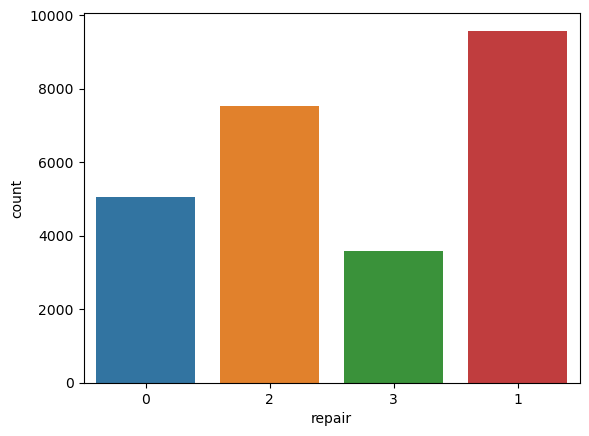

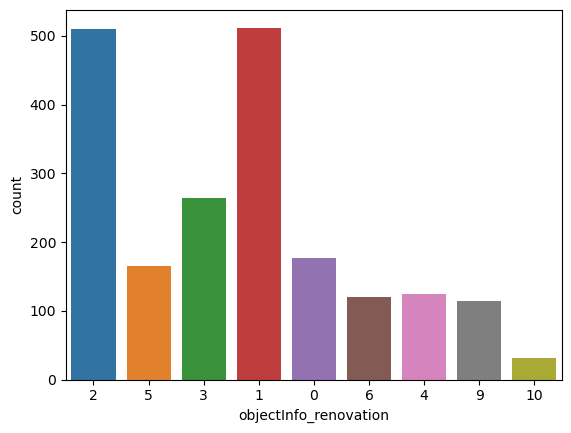

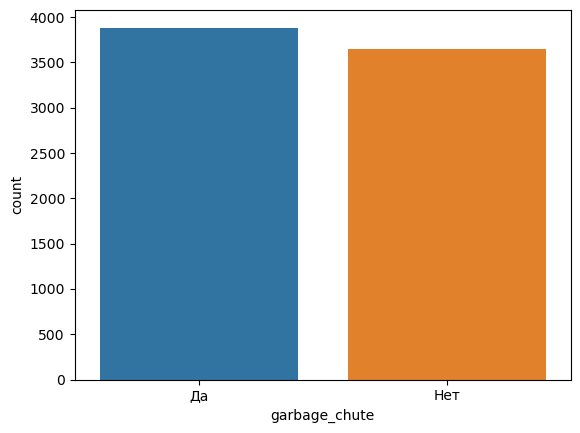

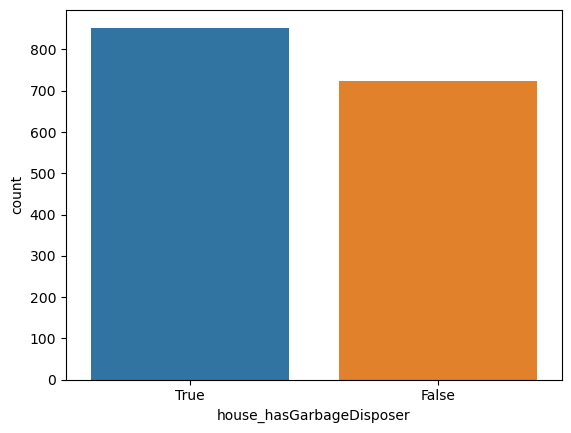

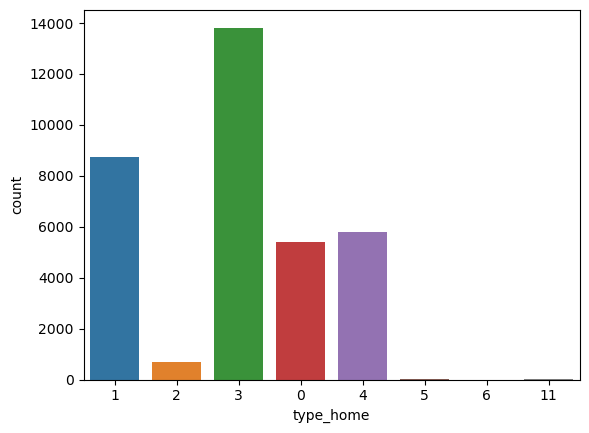

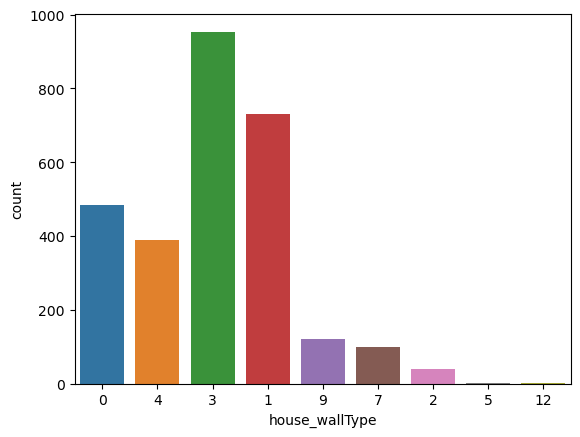

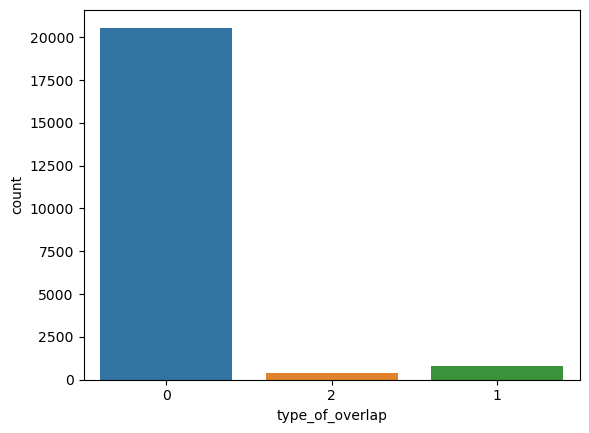

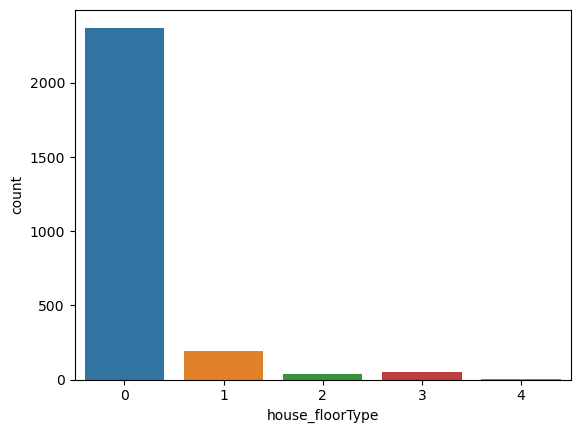

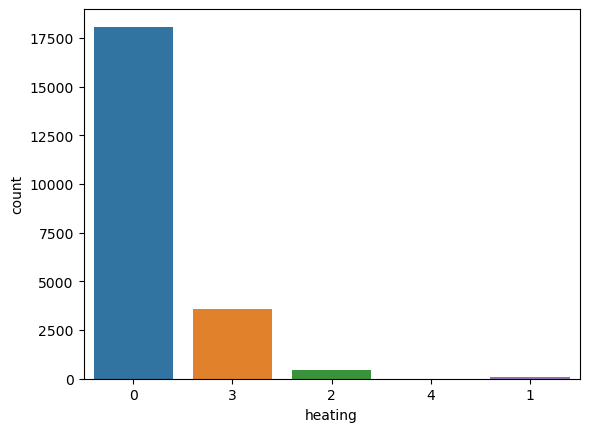

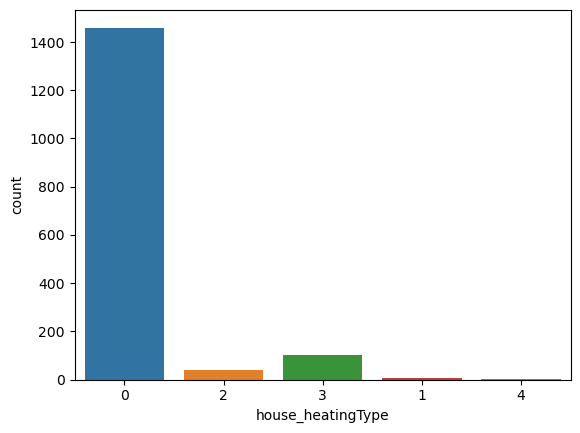

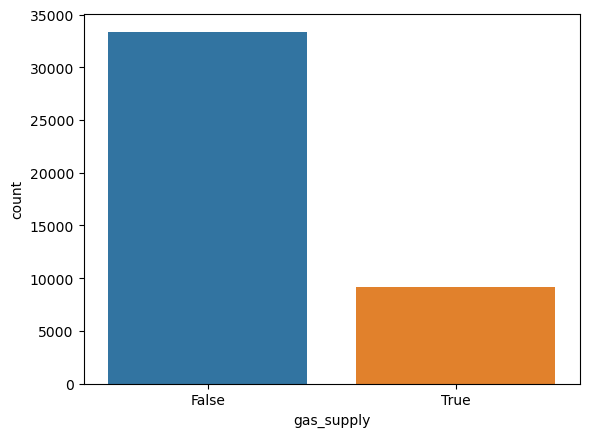

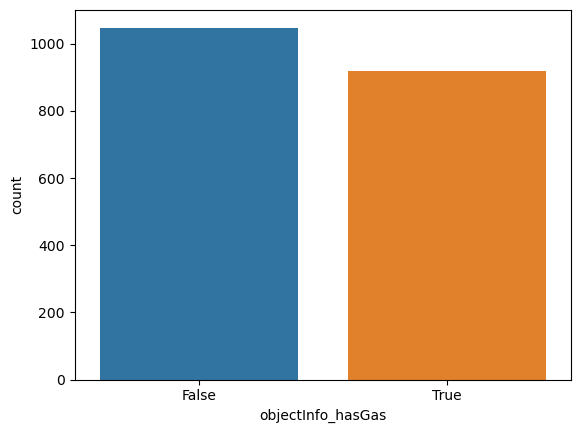

<Figure size 640x480 with 0 Axes>

In [135]:
for col_cian, col_domclick in zip(cat_cols_cian, cat_cols_domclick):
    sns.countplot(data = df_cian, x = col_cian)
    plt.figure()
    sns.countplot(data = df_domclick, x = col_domclick)
    plt.figure()

In [136]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

In [137]:
common_features = ['price', 'room_count', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'repairType', 'buildYear', 'hasGarbageChute', 'wallType', 'floorType', 'entranceCount',
                   'heatingType', 'hasGas', 'elevatorCount']

domclick_cf = ['price', 'objectInfo_rooms', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 'objectInfo_livingArea', 
               'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies', 'objectInfo_renovation', 'house_buildYear',
               'house_hasGarbageDisposer', 'house_wallType', 'house_floorType', 'house_entranceCount', 'house_heatingType', 
               'objectInfo_hasGas', 'house_elevatorsCount']

cian_cf = ['price', 'room_count', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling', 'bathroom',
           'balcony', 'repair', 'yer_home', 'garbage_chute',  'type_home', 'type_of_overlap', 'entrances', 'heating', 'gas_supply',
           'number_of_elevators']

In [138]:
merge_domclick = df_domclick_prepared[domclick_cf]
merge_domclick.columns = common_features
merge_domclick.info()
merge_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            3136 non-null   int64  
 1   room_count       3136 non-null   int64  
 2   floor            3136 non-null   int64  
 3   totalFloors      3136 non-null   int64  
 4   area             3136 non-null   float64
 5   kitchenArea      2709 non-null   float64
 6   livingArea       2930 non-null   float64
 7   ceilingHeight    1575 non-null   float64
 8   bathroomCount    1477 non-null   float64
 9   balconyCount     3136 non-null   int64  
 10  repairType       2019 non-null   float64
 11  buildYear        3114 non-null   float64
 12  hasGarbageChute  1576 non-null   float64
 13  wallType         2816 non-null   float64
 14  floorType        2650 non-null   float64
 15  entranceCount    1617 non-null   float64
 16  heatingType      1606 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,7900000,1,7,17,35.1,8.4,18.4,NaN,1.0,0,NaN,2008.0,1.0,0.0,0.0,5.0,0.0,NaN,10.0
1,13400000,1,8,17,43.6,15.0,21.2,NaN,NaN,0,NaN,2014.0,NaN,4.0,0.0,NaN,NaN,NaN,1.0
2,5100000,0,9,33,26.0,NaN,16.0,NaN,NaN,0,NaN,2019.0,NaN,3.0,0.0,NaN,NaN,NaN,NaN
3,24000000,5,5,7,136.1,18.7,78.3,NaN,1.0,3,NaN,1991.0,1.0,1.0,0.0,4.0,0.0,1.0,13.0
4,8200000,2,12,12,52.7,10.2,28.7,NaN,1.0,0,NaN,1982.0,1.0,0.0,0.0,3.0,0.0,NaN,6.0


In [139]:
merge_domclick['repairType'].unique()

array([nan,  2.,  5.,  3.,  1.,  0.,  6.,  4.,  9., 10.])

In [140]:
merge_cian = df_cian_prepared[cian_cf]
merge_cian.columns = common_features
merge_cian.reset_index(drop = True, inplace=True)
merge_cian.info()
merge_cian.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42500 entries, 0 to 42499
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            42500 non-null  int64  
 1   room_count       42500 non-null  int64  
 2   floor            42500 non-null  int64  
 3   totalFloors      42500 non-null  int64  
 4   area             42500 non-null  float64
 5   kitchenArea      35087 non-null  float64
 6   livingArea       37655 non-null  float64
 7   ceilingHeight    32974 non-null  float64
 8   bathroomCount    32888 non-null  float64
 9   balconyCount     23225 non-null  float64
 10  repairType       25751 non-null  float64
 11  buildYear        24582 non-null  float64
 12  hasGarbageChute  7528 non-null   float64
 13  wallType         34452 non-null  float64
 14  floorType        21773 non-null  float64
 15  entranceCount    23324 non-null  float64
 16  heatingType      22148 non-null  float64
 17  hasGas      

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,1175950,3,9,12,76.8,13.2,NaN,NaN,1.0,1.0,0.0,2022.0,NaN,NaN,NaN,10.0,NaN,0.0,1.0
1,1900000,0,3,5,8.0,1.0,2.0,2.64,1.0,NaN,2.0,1900.0,NaN,NaN,NaN,4.0,NaN,1.0,NaN
2,2138000,0,-1,6,7.6,1.5,NaN,NaN,NaN,NaN,2.0,1904.0,NaN,1.0,0.0,4.0,0.0,1.0,NaN
3,2000000,0,1,8,9.9,2.7,5.7,2.40,1.0,NaN,3.0,1907.0,NaN,1.0,0.0,6.0,0.0,1.0,NaN
4,2100000,0,1,8,10.6,3.1,6.0,2.40,1.0,NaN,3.0,1907.0,NaN,1.0,0.0,6.0,0.0,1.0,NaN


In [141]:
df_combined = pd.concat([merge_domclick, merge_cian])

In [142]:
df_combined = df_combined.drop_duplicates()

In [143]:
df_combined.reset_index(drop = True, inplace=True)

In [144]:
df_combined.info()
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45413 entries, 0 to 45412
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            45413 non-null  int64  
 1   room_count       45413 non-null  int64  
 2   floor            45413 non-null  int64  
 3   totalFloors      45413 non-null  int64  
 4   area             45413 non-null  float64
 5   kitchenArea      37684 non-null  float64
 6   livingArea       40366 non-null  float64
 7   ceilingHeight    34399 non-null  float64
 8   bathroomCount    34264 non-null  float64
 9   balconyCount     26235 non-null  float64
 10  repairType       27661 non-null  float64
 11  buildYear        27586 non-null  float64
 12  hasGarbageChute  9099 non-null   float64
 13  wallType         37125 non-null  float64
 14  floorType        24376 non-null  float64
 15  entranceCount    24895 non-null  float64
 16  heatingType      23712 non-null  float64
 17  hasGas      

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,7900000,1,7,17,35.1,8.4,18.4,NaN,1.0,0.0,NaN,2008.0,1.0,0.0,0.0,5.0,0.0,NaN,10.0
1,13400000,1,8,17,43.6,15.0,21.2,NaN,NaN,0.0,NaN,2014.0,NaN,4.0,0.0,NaN,NaN,NaN,1.0
2,5100000,0,9,33,26.0,NaN,16.0,NaN,NaN,0.0,NaN,2019.0,NaN,3.0,0.0,NaN,NaN,NaN,NaN
3,24000000,5,5,7,136.1,18.7,78.3,NaN,1.0,3.0,NaN,1991.0,1.0,1.0,0.0,4.0,0.0,1.0,13.0
4,8200000,2,12,12,52.7,10.2,28.7,NaN,1.0,0.0,NaN,1982.0,1.0,0.0,0.0,3.0,0.0,NaN,6.0


<Axes: xlabel='price', ylabel='Count'>

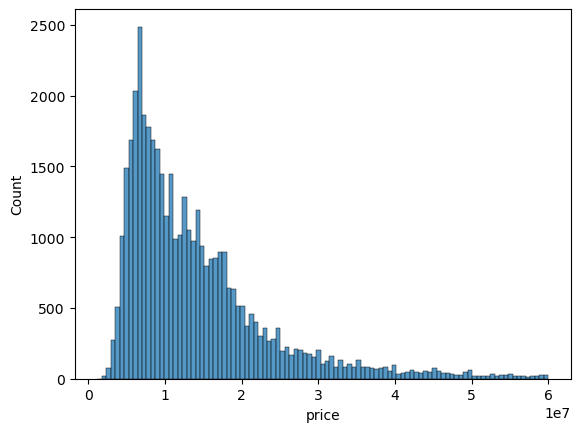

In [145]:
sns.histplot(data = df_cian_prepared.query('price < 60000000'), x = 'price')

<Axes: xlabel='price', ylabel='Count'>

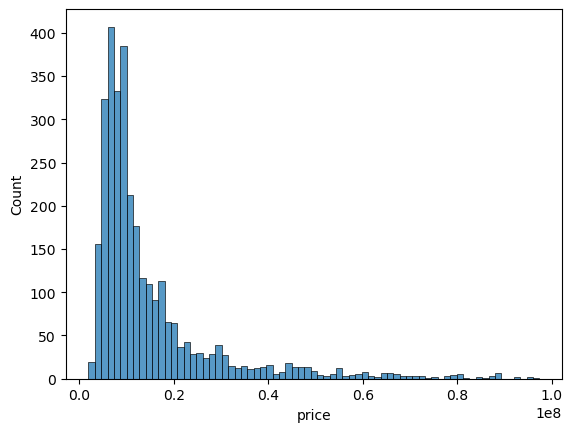

In [146]:
sns.histplot(data = df_domclick_prepared.query('price < 100000000'), x = 'price')

<Axes: xlabel='price', ylabel='Count'>

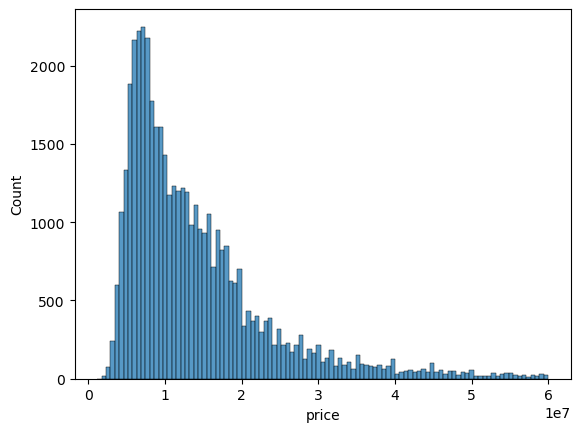

In [147]:
sns.histplot(data = df_combined.query('price < 60000000'), x = 'price')

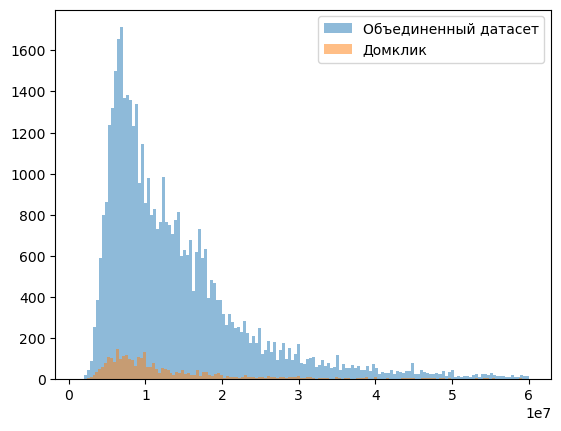

In [148]:
plt.hist(df_combined.query('price < 60000000')['price'], 150, alpha=0.5, label='Объединенный датасет')
plt.hist(df_domclick_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Домклик')
plt.legend(loc='upper right')
plt.show()

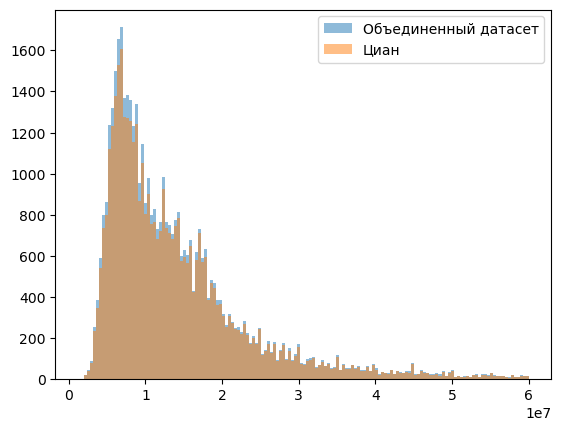

In [149]:
plt.hist(df_combined.query('price < 60000000')['price'], 150, alpha=0.5, label='Объединенный датасет')
plt.hist(df_cian_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Циан')
plt.legend(loc='upper right')
plt.show()

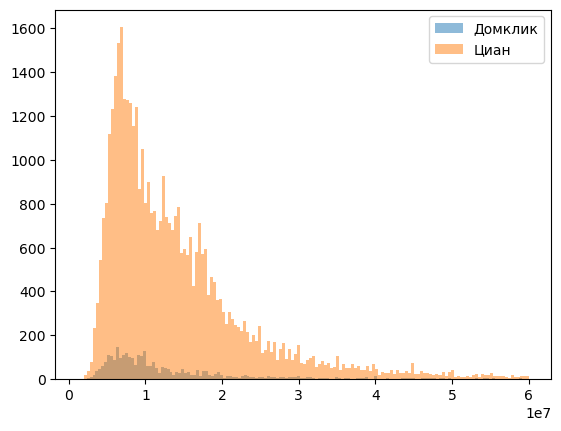

In [150]:
plt.hist(df_domclick_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Домклик')
plt.hist(df_cian_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Циан')
plt.legend(loc='upper right')
plt.show()

In [151]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [152]:
df_domclick_prepared['price'].describe()

count        3136.00000
mean     15460722.33291
std      16478074.42910
min       1939000.00000
25%       6900000.00000
50%       9800000.00000
75%      16912500.00000
max     265000000.00000
Name: price, dtype: float64

In [153]:
df_cian_prepared['price'].describe()

count       42500.00000
mean     14966360.20715
std      12359995.52424
min       1175950.00000
25%       7329300.00000
50%      11500000.00000
75%      17846984.75000
max     115866000.00000
Name: price, dtype: float64

In [154]:
df_combined['price'].describe()

count       45413.00000
mean     15012559.37617
std      12706458.42087
min       1175950.00000
25%       7300000.00000
50%      11351222.00000
75%      17800325.00000
max     265000000.00000
Name: price, dtype: float64

In [155]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

cat_cols_cf = ['repairType', 'hasGarbageChute', 'wallType', 'floorType', 'heatingType', 'hasGas']

In [156]:
num_cols_cian = ['price', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling',
                 'bathroom', 'balcony', 'buildYear', 'entranceCount', 'elevatorCount']

num_cols_domclick = ['price', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 
                     'objectInfo_livingArea', 'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies',
                     'house_buildYear', 'house_entranceCount', 'house_elevatorsCount']

num_cols_cf = ['price', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'buildYear', 'entranceCount', 'elevatorCount']

C:\Users\shadee\AppData\Local\Temp\ipykernel_16124\3097855927.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


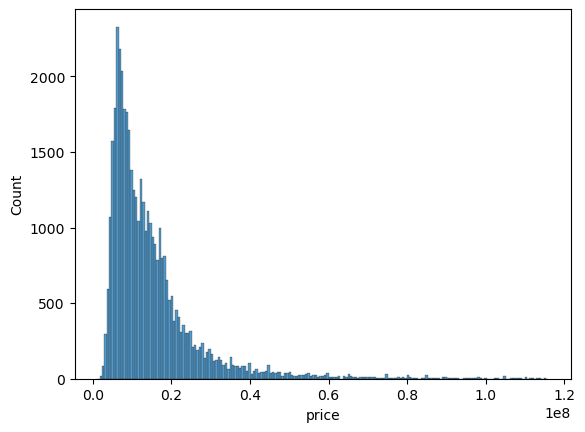

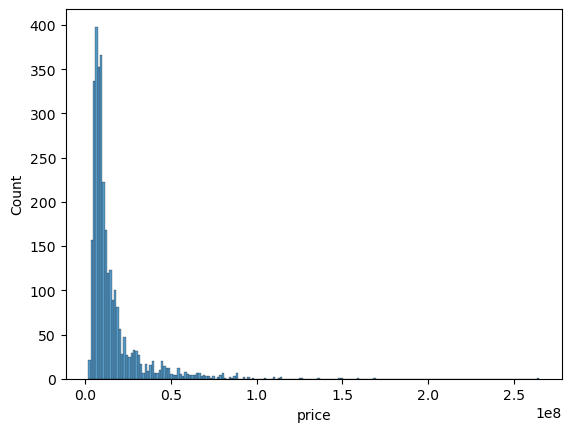

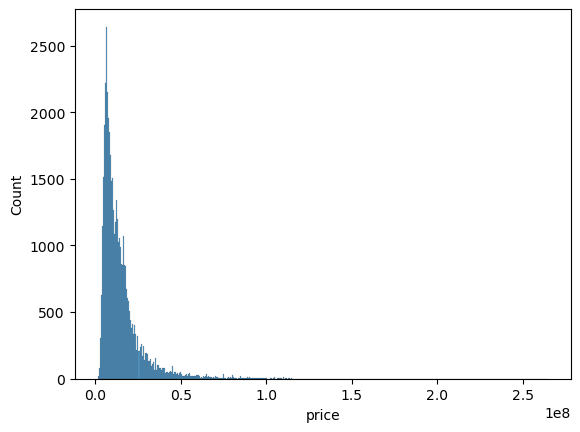

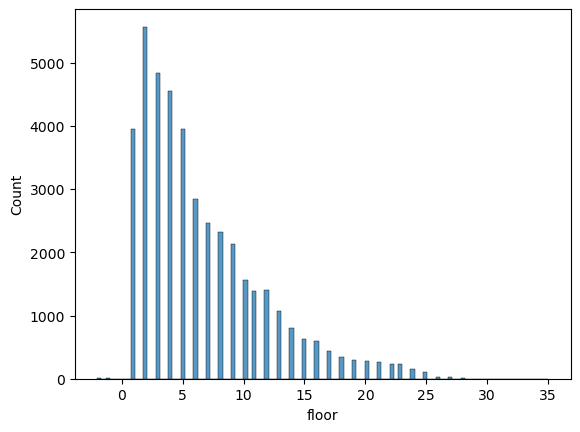

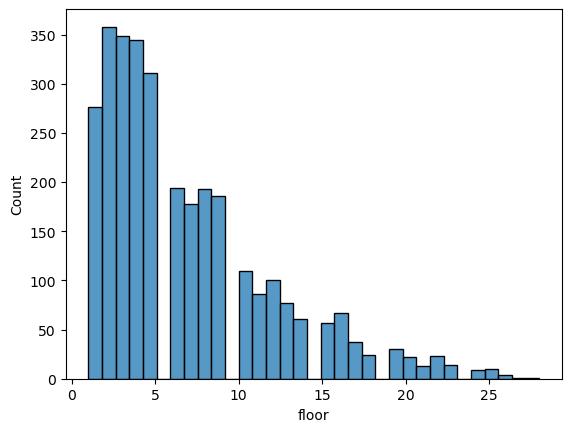

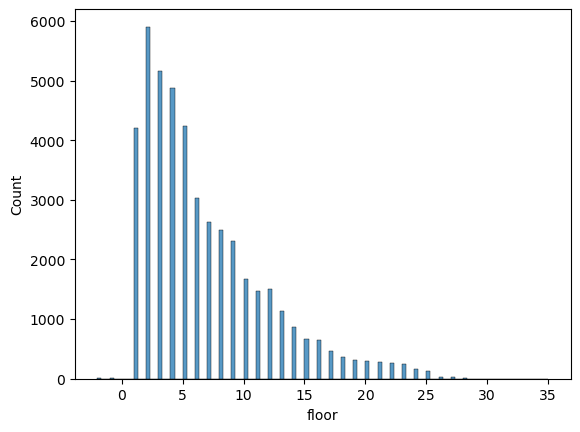

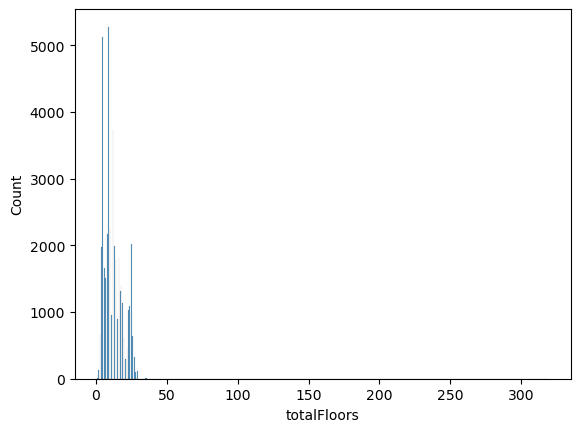

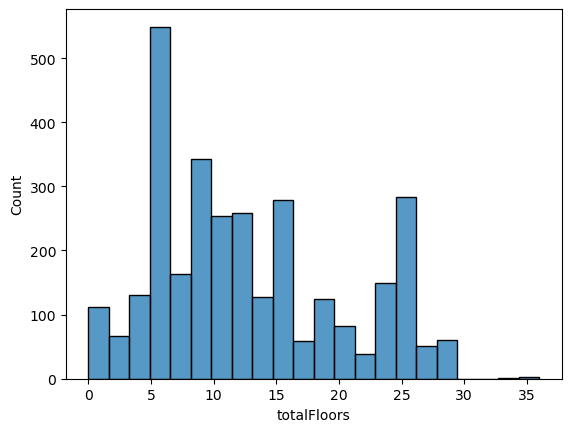

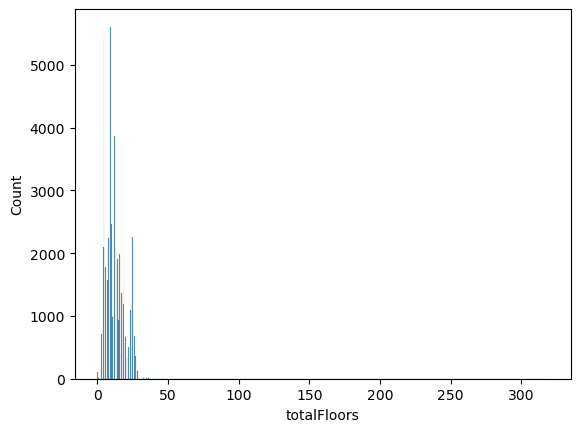

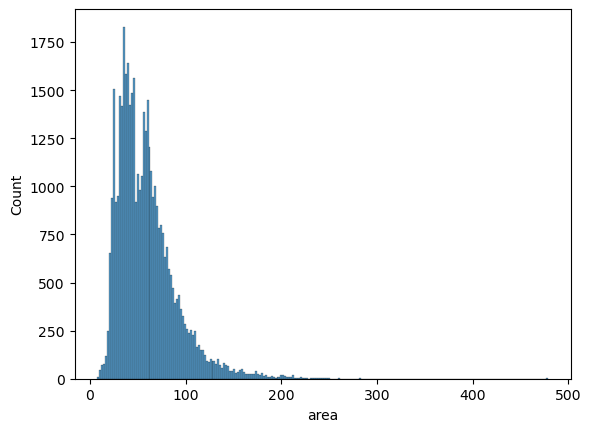

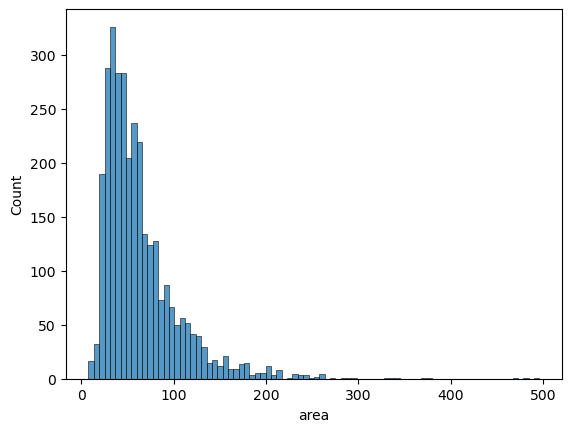

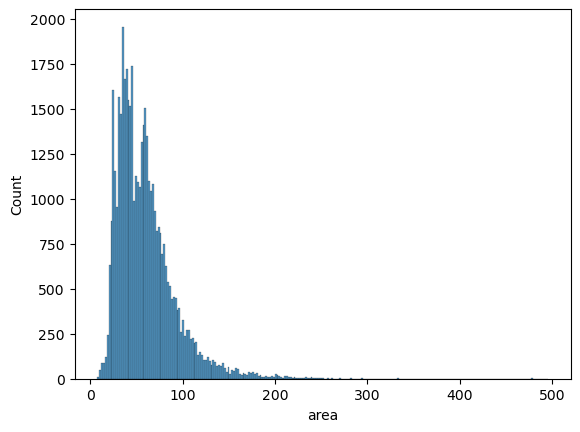

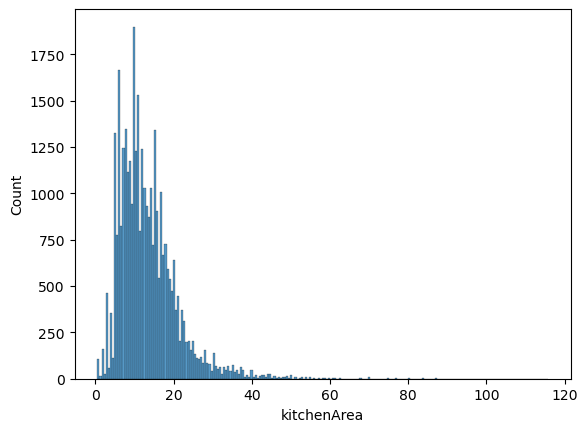

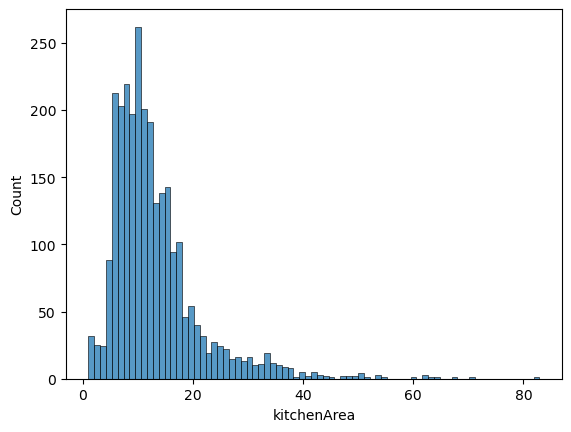

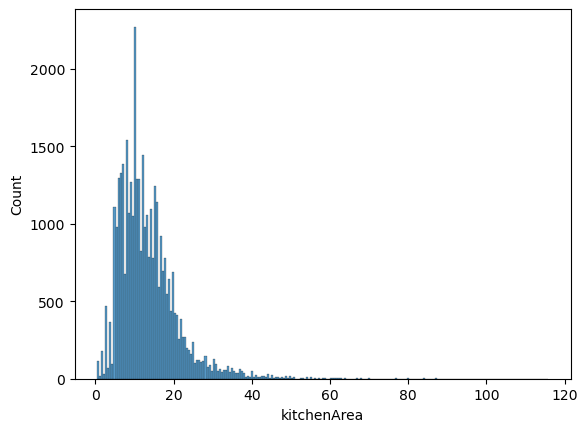

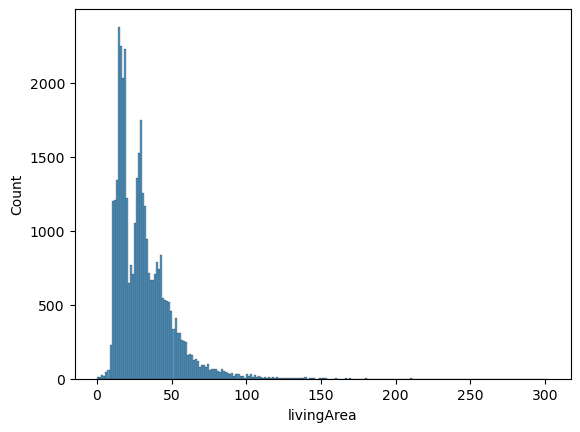

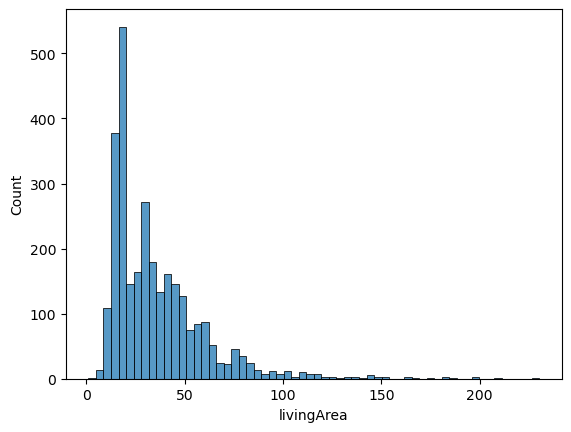

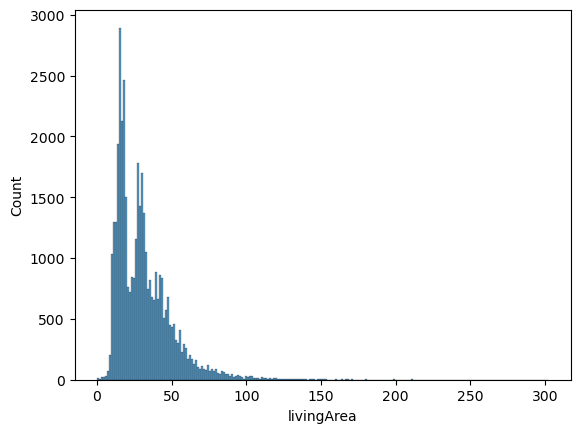

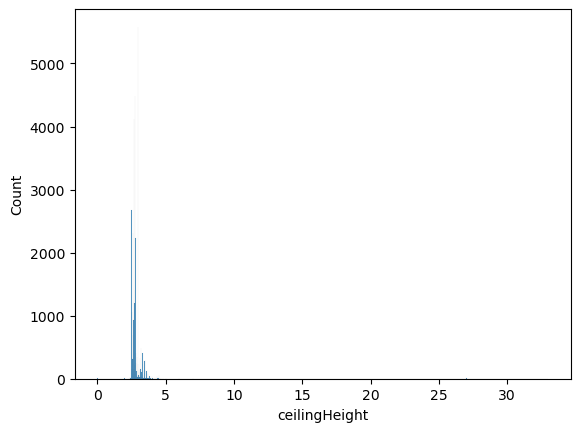

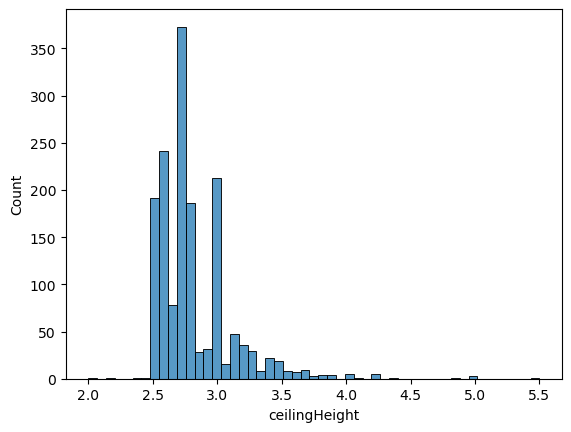

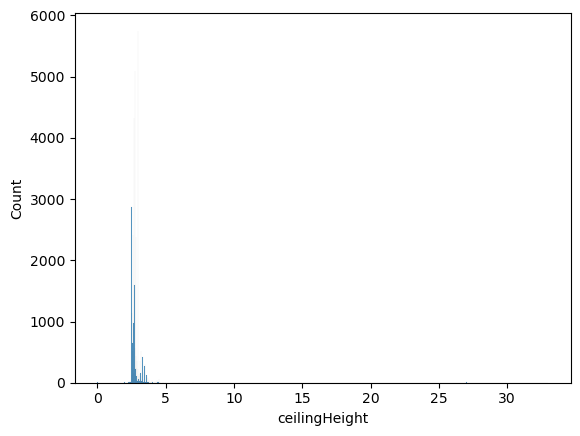

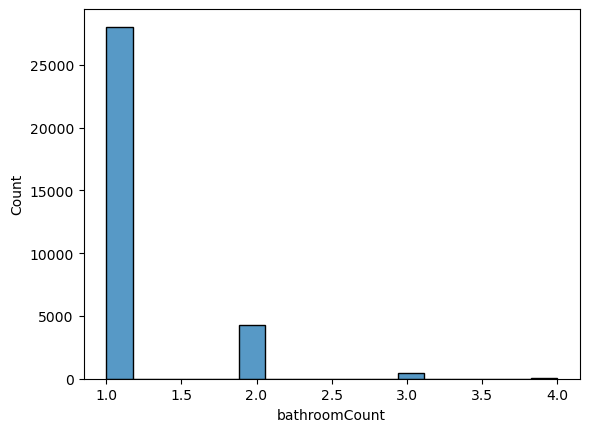

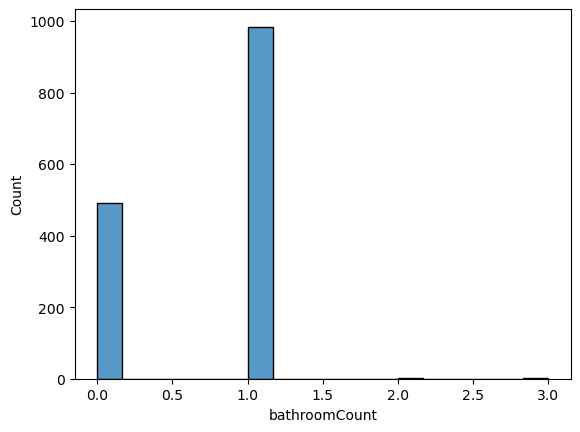

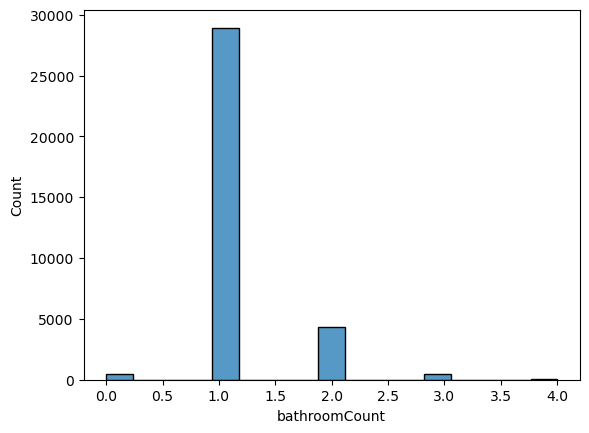

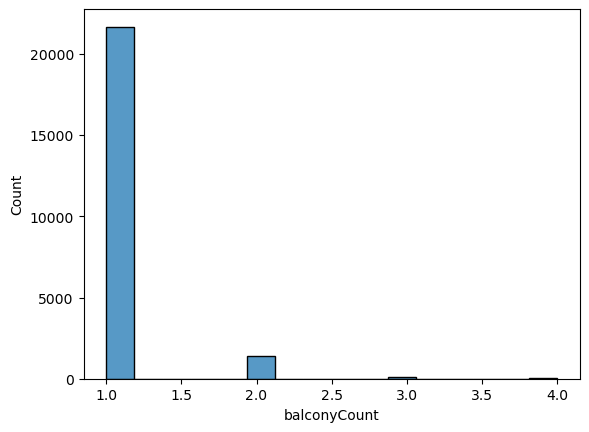

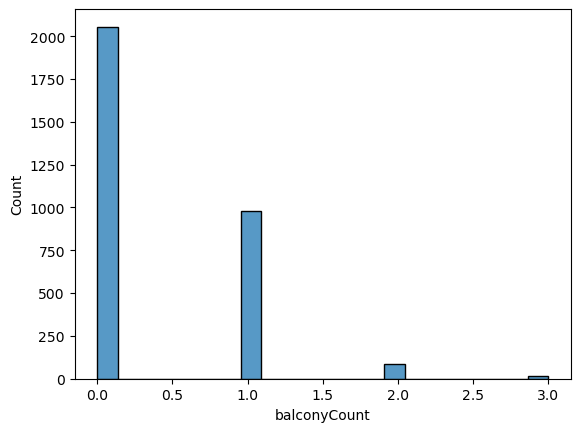

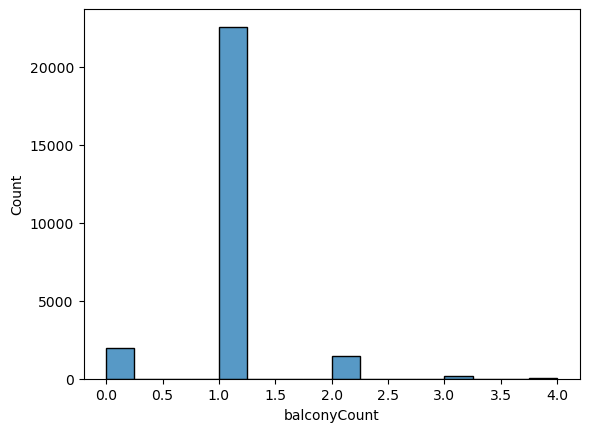

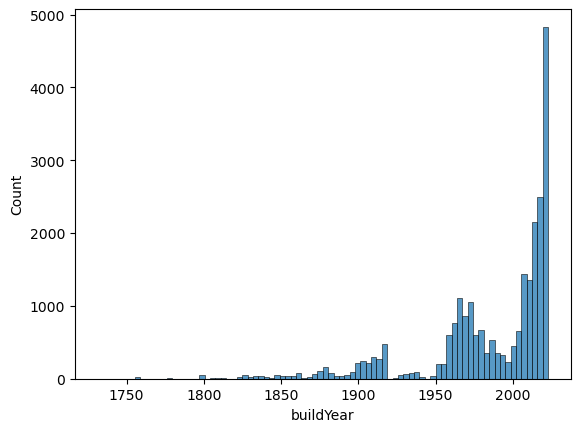

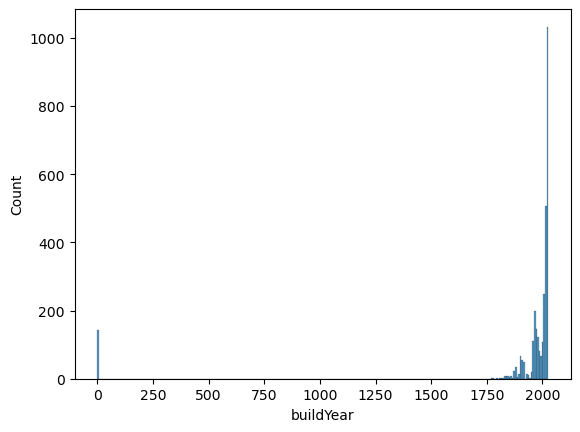

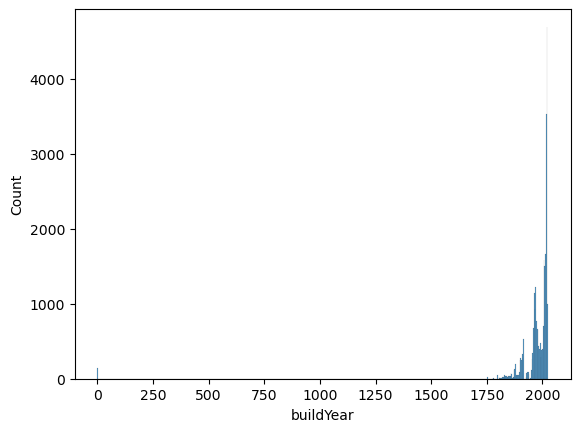

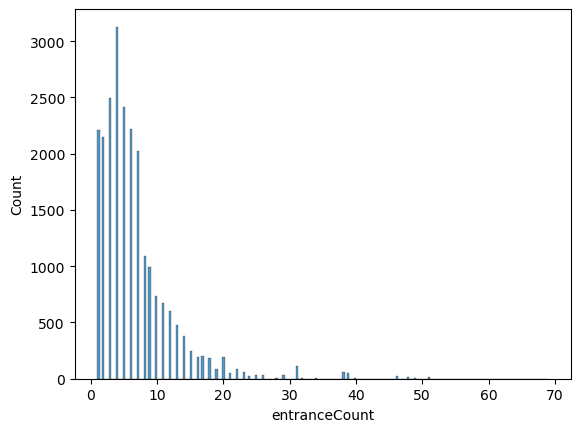

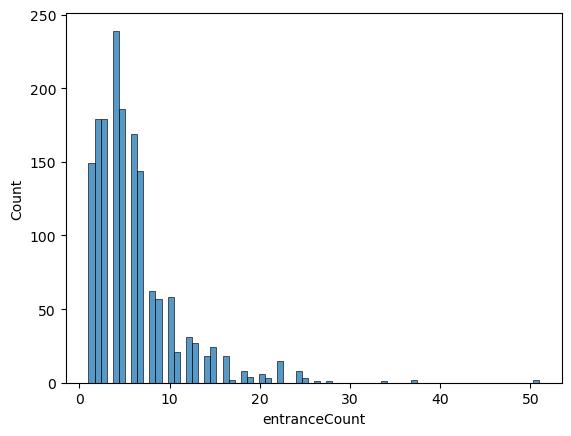

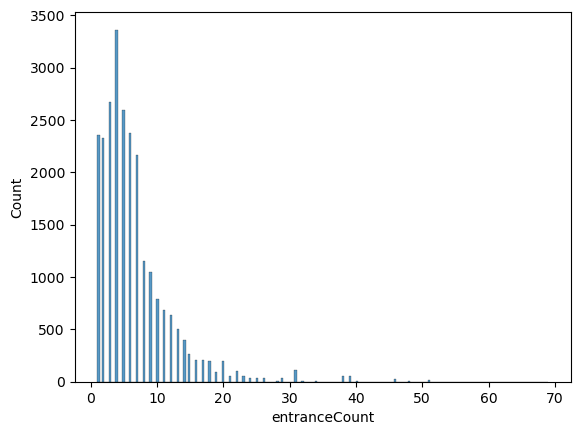

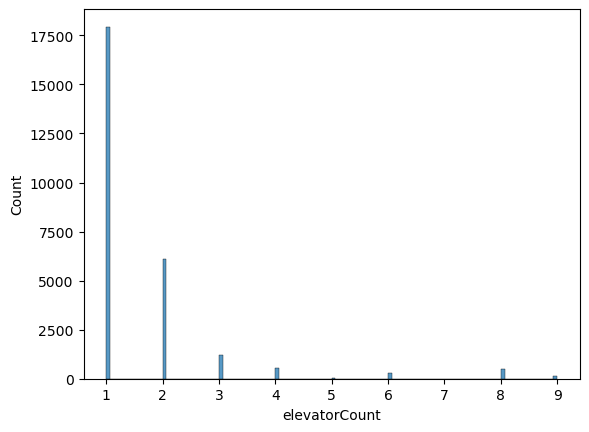

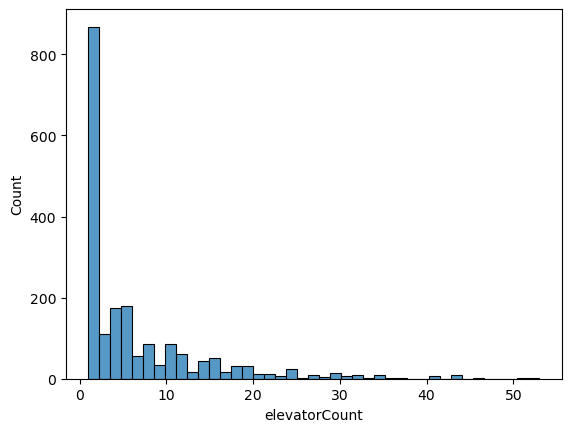

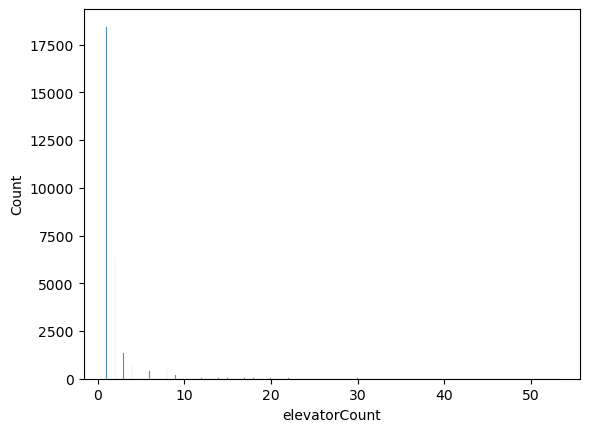

<Figure size 640x480 with 0 Axes>

In [157]:
for col in num_cols_cf:
    sns.histplot(data = merge_cian, x = col)
    plt.figure()
    sns.histplot(data = merge_domclick, x = col)
    plt.figure()
    sns.histplot(data = df_combined, x = col)
    plt.figure()

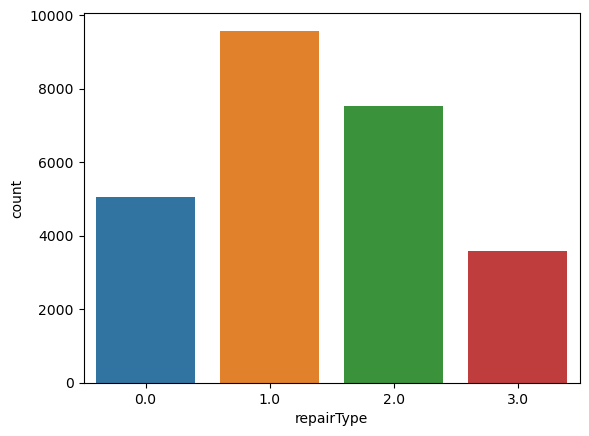

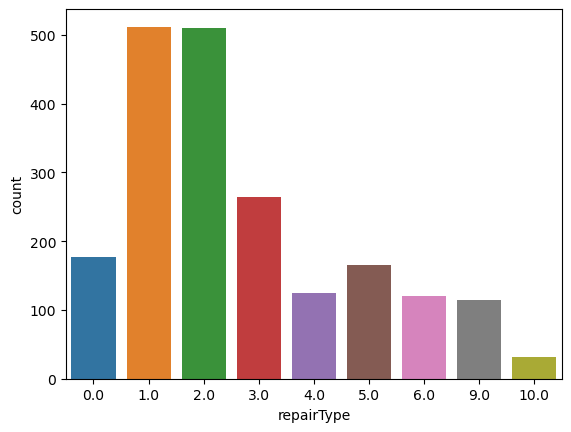

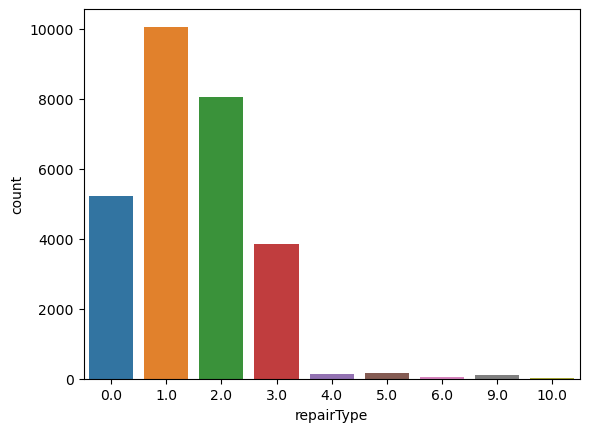

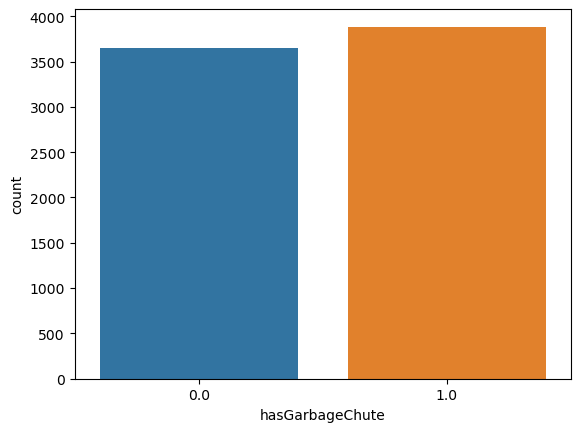

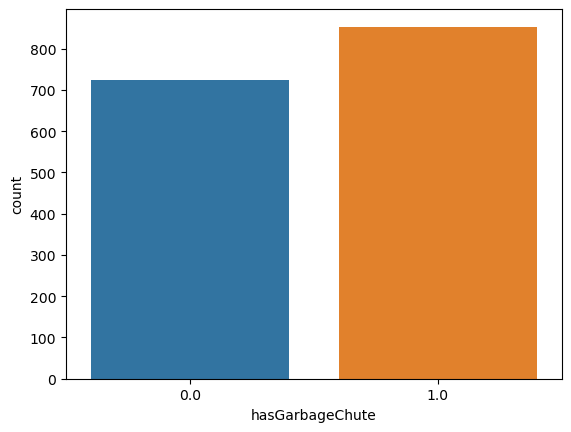

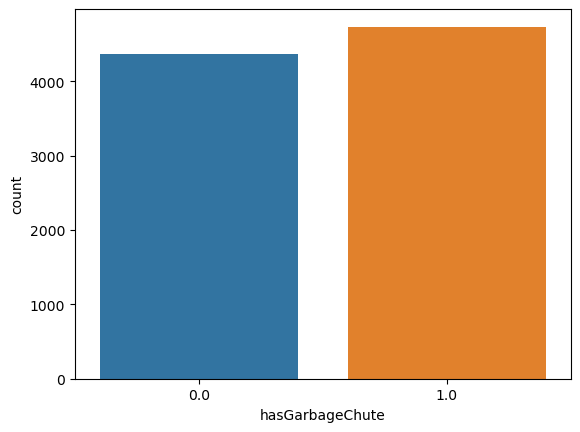

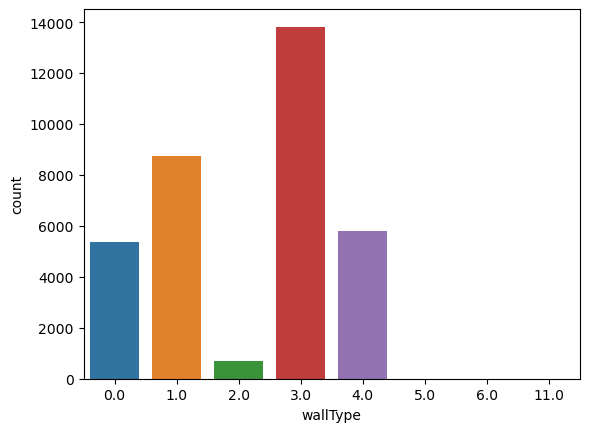

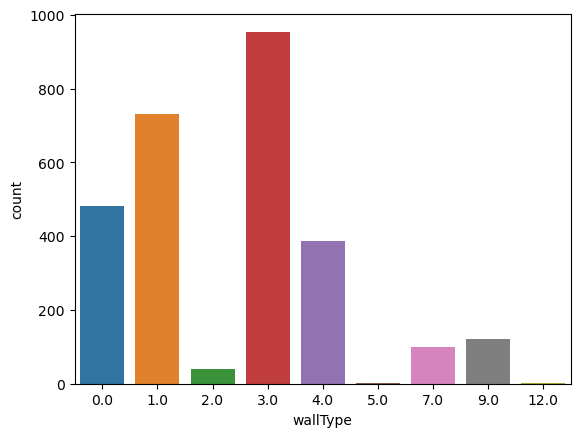

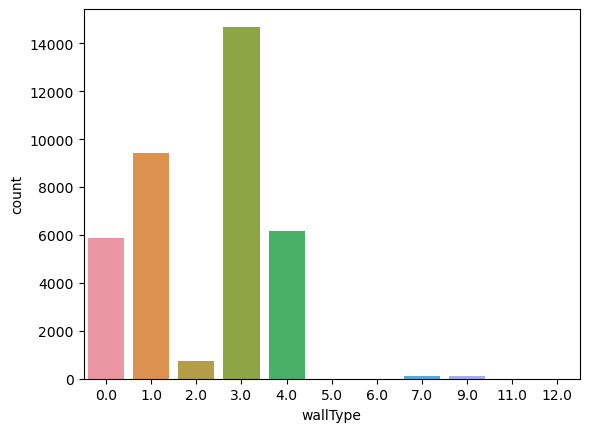

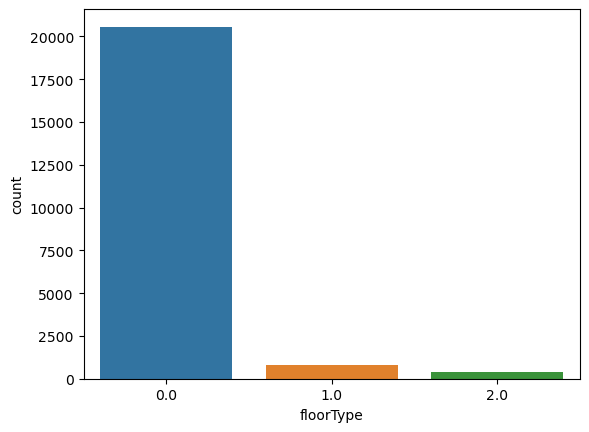

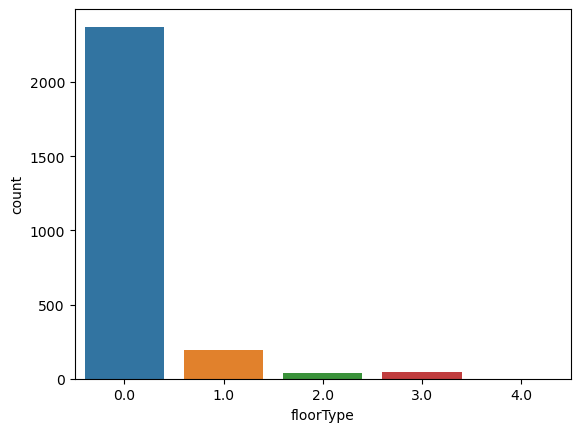

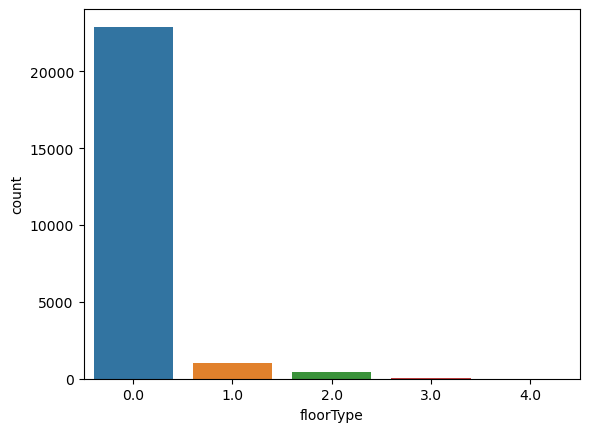

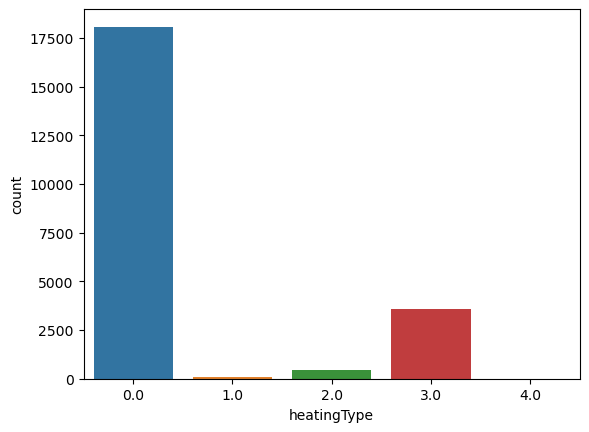

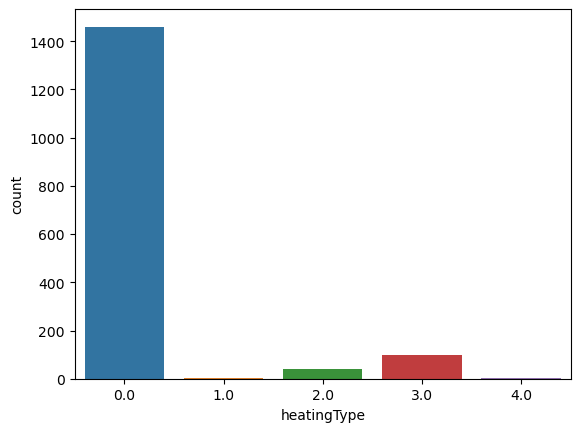

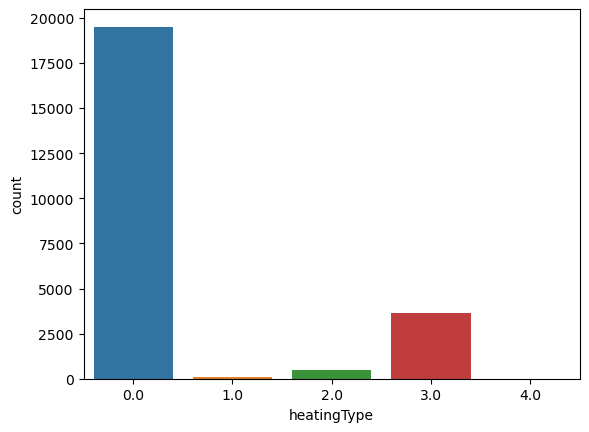

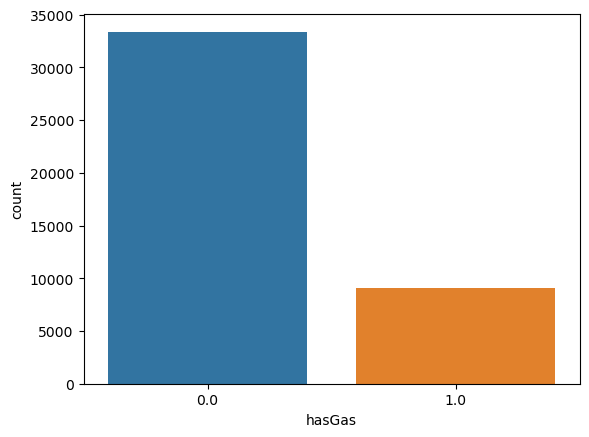

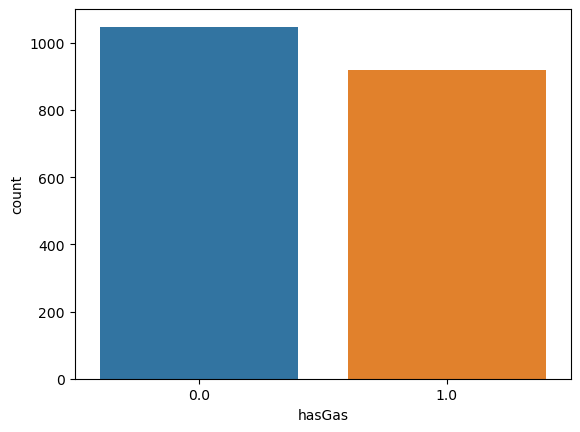

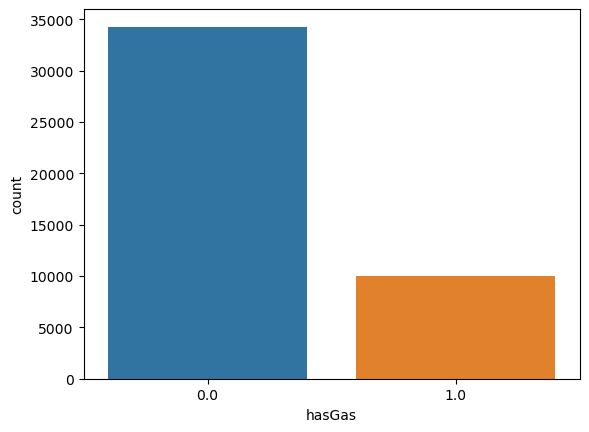

<Figure size 640x480 with 0 Axes>

In [158]:
for col in cat_cols_cf:
    sns.countplot(data = merge_cian, x = col)
    plt.figure()
    sns.countplot(data = merge_domclick, x = col)
    plt.figure()
    sns.countplot(data = df_combined, x = col)
    plt.figure()

# Заполнение пропусков

In [159]:
from miceforest import ImputationKernel

domclick_mice_kernel = ImputationKernel(data = df_domclick_prepared, save_all_iterations = True, random_state = 123)
domclick_mice_kernel.mice(10)
domclick_imputation = domclick_mice_kernel.complete_data()

In [160]:
domclick_imputation.info()
domclick_imputation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3136 non-null   float64
 1   longitude                      3136 non-null   float64
 2   price                          3136 non-null   int64  
 3   house_floors                   3136 non-null   int64  
 4   house_buildYear                3136 non-null   float64
 5   house_ceilingHeight            3136 non-null   float64
 6   house_hasGarbageDisposer       3136 non-null   float64
 7   house_liftsFreight             3136 non-null   float64
 8   house_liftsPassenger           3136 non-null   float64
 9   house_wallType                 3136 non-null   float64
 10  house_areaNonResidential       3136 non-null   float64
 11  house_basementArea             3136 non-null   float64
 12  house_chuteCount               3136 non-null   f

,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaNonResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation
0,59.82695,30.32911,7900000,17,2008.00000,2.65000,1.00000,1.00000,1.00000,0.00000,0.00000,993.70000,5.00000,0.00000,4.00000,1.00000,10.00000,3.00000,5.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,2.00000,1,35.10000,8.40000,18.40000,7,1.00000,1.00000,0,0.00000,10.00000
1,59.85683,30.31632,13400000,17,2014.00000,2.67000,1.00000,0.00000,1.00000,4.00000,729.90000,830.00000,1.00000,0.00000,6.00000,1.00000,1.00000,0.00000,1.00000,2.00000,0.00000,5.00000,0.00000,0.00000,0.00000,1.00000,2.00000,1,43.60000,15.00000,21.20000,8,1.00000,0.00000,0,0.00000,2.00000
2,59.83176,30.54679,5100000,33,2019.00000,2.70000,0.00000,2.00000,2.00000,3.00000,2085.60000,2656.90000,4.00000,0.00000,2.00000,1.00000,8.00000,6.00000,4.00000,2.00000,0.00000,5.00000,3.00000,1058.00000,0.00000,1.00000,2.00000,0,26.00000,3.00000,16.00000,9,1.00000,0.00000,0,0.00000,2.00000
3,59.84915,30.31412,24000000,7,1991.00000,3.00000,1.00000,0.00000,1.00000,1.00000,14164.00000,6721.00000,4.00000,0.00000,2.00000,1.00000,13.00000,11.00000,4.00000,1.00000,0.00000,4.00000,0.00000,0.00000,0.00000,1.00000,0.00000,5,136.10000,18.70000,78.30000,5,2.00000,1.00000,3,1.00000,2.00000
4,59.95311,30.49190,8200000,12,1982.00000,2.65000,1.00000,0.00000,1.00000,0.00000,76.00000,1327.00000,3.00000,0.00000,2.00000,1.00000,6.00000,11.00000,3.00000,1.00000,0.00000,3.00000,0.00000,0.00000,0.00000,1.00000,0.00000,2,52.70000,10.20000,28.70000,12,0.00000,1.00000,0,0.00000,1.00000


In [161]:
cian_mice_kernel = ImputationKernel(data = df_cian_prepared, save_all_iterations = True, random_state = 123)
cian_mice_kernel.mice(10)
cian_imputation = cian_mice_kernel.complete_data()

In [162]:
cian_imputation.info()
cian_imputation.head()

<class 'pandas.core.frame.DataFrame'>
Index: 42500 entries, 2 to 68361
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                42500 non-null  int64  
 1   price_for_metr       42500 non-null  int64  
 2   floor_object         42500 non-null  int64  
 3   total_floors         42500 non-null  int64  
 4   type_of_home         42500 non-null  float64
 5   square_home          42500 non-null  float64
 6   live_square          42500 non-null  float64
 7   kitchen_square       42500 non-null  float64
 8   height_ceiling       42500 non-null  float64
 9   bathroom             42500 non-null  float64
 10  balcony              42500 non-null  float64
 11  repair               42500 non-null  float64
 12  yer_home             42500 non-null  float64
 13  garbage_chute        42500 non-null  float64
 14  type_home            42500 non-null  float64
 15  type_of_overlap      42500 non-null  floa

,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,gas_supply,finishing,number_of_elevators,room_count
2,1175950,15312,9,12,0.00000,76.80000,34.70000,13.20000,2.70000,1.00000,1.00000,0.00000,2022.00000,1.00000,3.00000,0.00000,10.00000,3.00000,0.00000,1.00000,1.00000,3
11,1900000,237500,3,5,0.00000,8.00000,2.00000,1.00000,2.64000,1.00000,1.00000,2.00000,1900.00000,0.00000,1.00000,0.00000,4.00000,0.00000,1.00000,4.00000,1.00000,0
24,2138000,281316,-1,6,1.00000,7.60000,7.00000,1.50000,2.80000,1.00000,1.00000,2.00000,1904.00000,1.00000,1.00000,0.00000,4.00000,0.00000,1.00000,4.00000,1.00000,0
25,2000000,202020,1,8,1.00000,9.90000,5.70000,2.70000,2.40000,1.00000,1.00000,3.00000,1907.00000,0.00000,1.00000,0.00000,6.00000,0.00000,1.00000,5.00000,1.00000,0
26,2100000,198113,1,8,1.00000,10.60000,6.00000,3.10000,2.40000,1.00000,1.00000,3.00000,1907.00000,0.00000,1.00000,0.00000,6.00000,0.00000,1.00000,5.00000,1.00000,0


In [163]:
combined_mice_kernel = ImputationKernel(data = df_combined, save_all_iterations = True, random_state = 123)
combined_mice_kernel.mice(10)
combined_imputation = combined_mice_kernel.complete_data()

In [164]:
combined_imputation.info()
combined_imputation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45413 entries, 0 to 45412
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            45413 non-null  int64  
 1   room_count       45413 non-null  int64  
 2   floor            45413 non-null  int64  
 3   totalFloors      45413 non-null  int64  
 4   area             45413 non-null  float64
 5   kitchenArea      45413 non-null  float64
 6   livingArea       45413 non-null  float64
 7   ceilingHeight    45413 non-null  float64
 8   bathroomCount    45413 non-null  float64
 9   balconyCount     45413 non-null  float64
 10  repairType       45413 non-null  float64
 11  buildYear        45413 non-null  float64
 12  hasGarbageChute  45413 non-null  float64
 13  wallType         45413 non-null  float64
 14  floorType        45413 non-null  float64
 15  entranceCount    45413 non-null  float64
 16  heatingType      45413 non-null  float64
 17  hasGas      

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,7900000,1,7,17,35.10000,8.40000,18.40000,2.80000,1.00000,0.00000,5.00000,2008.00000,1.00000,0.00000,0.00000,5.00000,0.00000,0.00000,10.00000
1,13400000,1,8,17,43.60000,15.00000,21.20000,2.72000,1.00000,0.00000,9.00000,2014.00000,1.00000,4.00000,0.00000,1.00000,0.00000,0.00000,1.00000
2,5100000,0,9,33,26.00000,1.00000,16.00000,3.00000,0.00000,0.00000,3.00000,2019.00000,0.00000,3.00000,0.00000,6.00000,0.00000,0.00000,4.00000
3,24000000,5,5,7,136.10000,18.70000,78.30000,3.05000,1.00000,3.00000,2.00000,1991.00000,1.00000,1.00000,0.00000,4.00000,0.00000,1.00000,13.00000
4,8200000,2,12,12,52.70000,10.20000,28.70000,2.50000,1.00000,0.00000,3.00000,1982.00000,1.00000,0.00000,0.00000,3.00000,0.00000,0.00000,6.00000


In [165]:
combined_imputation['heatingType'].unique()

array([0., 2., 3., 1., 4.])

In [166]:
combined_imputation['repairType'].unique()

array([ 5.,  9.,  3.,  2.,  1.,  0.,  4., 10.,  6.])

# Сравнение моделей машинного обучения

## Разбиение данных

In [167]:
X_domclick = domclick_imputation.drop(['price'], axis=1).values
Y_domclick = domclick_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_domclick, X_test_domclick, y_train_domclick, y_test_domclick = train_test_split(X_domclick, Y_domclick, test_size=test_size, random_state=r_state)

In [168]:
X_cian = cian_imputation.drop(['price'], axis=1).values
Y_cian = cian_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_cian, X_test_cian, y_train_cian, y_test_cian = train_test_split(X_cian, Y_cian, test_size=test_size, random_state=r_state)

In [169]:
X_combined = combined_imputation.drop(['price'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

## Линейная регрессия

In [170]:
linear_regressor_domclick = LinearRegression()
linear_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = linear_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  46754995405690.53
MAE:  4079884.322411832
RMSE:  6837762.456073663
R2:  0.8168001246730663


In [171]:
linear_regressor_cian = LinearRegression()
linear_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = linear_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  11067747958050.072
MAE:  1969925.3034295037
RMSE:  3326822.501734962
R2:  0.9291506313063754


In [172]:
linear_regressor_combined = LinearRegression()
linear_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = linear_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  43304530354339.04
MAE:  3777715.0479825186
RMSE:  6580617.779079639
R2:  0.7365575735139336


## Случайный лес

In [173]:
rf_regressor_domclick = RandomForestRegressor()
rf_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = rf_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  30327690929792.246
MAE:  2602216.7927933675
RMSE:  5507058.282766966
R2:  0.8811671533900847


In [174]:
rf_regressor_cian = RandomForestRegressor()
rf_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = rf_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  283487369921.5649
MAE:  99505.80884157777
RMSE:  532435.3199418356
R2:  0.9981852766011942


In [175]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  23577847998367.004
MAE:  2396297.99024589
RMSE:  4855702.626640866
R2:  0.8565645340756576


## Дерево решений

In [176]:
tree_regressor_domclick = DecisionTreeRegressor()
tree_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = tree_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  78965319173516.55
MAE:  3950953.613520408
RMSE:  8886243.254239473
R2:  0.690590566800076


In [177]:
tree_regressor_cian = DecisionTreeRegressor()
tree_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = tree_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  1080670689930.9839
MAE:  241518.7915921569
RMSE:  1039553.1203026539
R2:  0.9930821666306898


In [178]:
tree_regressor_combined = DecisionTreeRegressor()
tree_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = tree_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  55935337134228.74
MAE:  3427538.9570782688
RMSE:  7478993.056169309
R2:  0.659718259951504


## Метод k-ближайших соседей

In [179]:
knn_regressor_domclick = KNeighborsRegressor()
knn_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = knn_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  192730653217180.4
MAE:  7717792.649489795
RMSE:  13882746.602066193
R2:  0.24482440144206297


In [180]:
knn_regressor_cian = KNeighborsRegressor()
knn_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = knn_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  56250445673429.484
MAE:  3933346.7302588234
RMSE:  7500029.711503114
R2:  0.6399169388566706


In [181]:
knn_regressor_combined = KNeighborsRegressor()
knn_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = knn_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  36615246037972.875
MAE:  3190865.7480711644
RMSE:  6051053.299878698
R2:  0.7772517290061918


## Перцептрон

In [182]:
nn_regressor_domclick = MLPRegressor()
nn_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = nn_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  383713609271225.9
MAE:  12103252.058757303
RMSE:  19588609.17143496
R2:  -0.5035032036636795


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [183]:
nn_regressor_cian = MLPRegressor()
nn_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = nn_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  80762020184860.53
MAE:  5792085.103732762
RMSE:  8986769.173894506
R2:  0.4830079103529542


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [184]:
nn_regressor_combined = MLPRegressor()
nn_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = nn_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  117989294951776.7
MAE:  6600228.222160682
RMSE:  10862287.740240391
R2:  0.28221398760968786


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## XGBoost

In [185]:
xgb_regressor_domclick = XGBRegressor()
xgb_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = xgb_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  28547929187096.27
MAE:  2440455.5392219387
RMSE:  5343026.2199521605
R2:  0.8881407853313225


In [186]:
xgb_regressor_cian = XGBRegressor()
xgb_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = xgb_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  344833576427.26184
MAE:  226589.81647058824
RMSE:  587225.3199814036
R2:  0.9977925734045591


In [187]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  23492846645014.3
MAE:  2559704.1181742116
RMSE:  4846941.989029196
R2:  0.8570816384663208


# Сохранить модель

In [188]:
combined_imputation.to_csv('datasets_18features/combined_spb_18feature.csv', index=False)

In [189]:
import pickle

rf_pkl_file = "models_18features/rf_model_spb_18features.pkl"
xgboost_pkl_file = "models_18features/xgboost_model_spb_18features.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

In [190]:
X_combined = combined_imputation.drop(['price', 'hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [191]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  23839618315982.965
MAE:  2416701.2304085596
RMSE:  4882583.160170748
R2:  0.8549720584826769


In [192]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  25054064728528.64
MAE:  2612776.829641536
RMSE:  5005403.553014346
R2:  0.8475839929121591


In [193]:
combined_imputation10 = combined_imputation.drop(['hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType'], axis=1)
combined_imputation10.to_csv('datasets_10features/combined_spb_10feature.csv', index=False)

In [194]:
rf_pkl_file = "models_10features/rf_model_spb_10features.pkl"
xgboost_pkl_file = "models_10features/xgboost_model_spb_10features.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

# One Hot Encoding

In [195]:
combined_ohe = pd.get_dummies(combined_imputation, columns = cat_cols_cf)
combined_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45413 entries, 0 to 45412
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                45413 non-null  int64  
 1   room_count           45413 non-null  int64  
 2   floor                45413 non-null  int64  
 3   totalFloors          45413 non-null  int64  
 4   area                 45413 non-null  float64
 5   kitchenArea          45413 non-null  float64
 6   livingArea           45413 non-null  float64
 7   ceilingHeight        45413 non-null  float64
 8   bathroomCount        45413 non-null  float64
 9   balconyCount         45413 non-null  float64
 10  buildYear            45413 non-null  float64
 11  entranceCount        45413 non-null  float64
 12  elevatorCount        45413 non-null  float64
 13  repairType_0.0       45413 non-null  bool   
 14  repairType_1.0       45413 non-null  bool   
 15  repairType_2.0       45413 non-null 

In [196]:
combined_ohe.to_csv('datasets_18features_ohe/combined_spb_18feature_ohe.csv', index=False)

In [197]:
X_combined = combined_ohe.drop(['price'], axis=1).values
Y_combined = combined_ohe['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [198]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  24385238512321.09
MAE:  2407791.4470587857
RMSE:  4938141.200119847
R2:  0.8516527866354366


In [199]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  23984700146548.082
MAE:  2578601.228994187
RMSE:  4897417.701865758
R2:  0.8540894554577653


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_features = ['auto', 'sqrt']

min_samples_split = [2, 5, 10, 15, 20, 25, 30]

min_samples_leaf = [1, 2, 4, 6, 8, 10, 15, 20, 25, 30]
params = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf}
model = RandomizedSearchCV(estimator = rf_regressor_combined, 
                   param_distributions = params, 
                   cv = 5, n_iter = 500)
                   
model.fit(X_train_combined, y_train_combined)

In [200]:
rf_pkl_file = "models_18features_ohe/rf_model_spb_18features_ohe.pkl"
xgboost_pkl_file = "models_18features_ohe/xgboost_model_spb_18features_ohe.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

In [201]:
cat_cols_ohe = [ele for ele in cat_cols_cf if ele not in ('hasGarbageChute', 'wallType', 'floorType', 'hasGas')]
combined_ohe_dropped = pd.get_dummies(combined_imputation10, columns = cat_cols_ohe)
combined_ohe_dropped.to_csv('datasets_10features_ohe/combined_spb_10feature_ohe.csv', index=False)
combined_ohe_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45413 entries, 0 to 45412
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            45413 non-null  int64  
 1   room_count       45413 non-null  int64  
 2   floor            45413 non-null  int64  
 3   totalFloors      45413 non-null  int64  
 4   area             45413 non-null  float64
 5   kitchenArea      45413 non-null  float64
 6   livingArea       45413 non-null  float64
 7   ceilingHeight    45413 non-null  float64
 8   buildYear        45413 non-null  float64
 9   repairType_0.0   45413 non-null  bool   
 10  repairType_1.0   45413 non-null  bool   
 11  repairType_2.0   45413 non-null  bool   
 12  repairType_3.0   45413 non-null  bool   
 13  repairType_4.0   45413 non-null  bool   
 14  repairType_5.0   45413 non-null  bool   
 15  repairType_6.0   45413 non-null  bool   
 16  repairType_9.0   45413 non-null  bool   
 17  repairType_1

In [202]:
X_combined = combined_ohe_dropped.drop(['price'], axis=1).values
Y_combined = combined_ohe_dropped['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [203]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  24619842055094.125
MAE:  2421481.1752396408
RMSE:  4961838.576081866
R2:  0.8502255796881578


In [204]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  25739432554042.11
MAE:  2620838.7363429186
RMSE:  5073404.434306623
R2:  0.843414568569917


In [205]:
rf_pkl_file = "models_10features_ohe/rf_model_spb_10features_ohe.pkl"
xgboost_pkl_file = "models_10features_ohe/xgboost_model_spb_10features_ohe.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)